## Classification with Olympic Data

---
- Brian Coari
- Stephen Merritt
- Cory Thigpen
- Quentin Thomas

This dataset tracks all Olympians' medal results from 1896-2016, as well as various physical attributes such as `Sex`, `Age`, `Weight`, and `Height`. In this lab we will (1) predict podium finishers using binary classification and (2) predict the sport a podium-finishing athlete played using multinomial classification for Olympic games on or after 2010.

### Data Preparation

#### Section 1
---

In [45]:
import numpy as np
import pandas as pd
df = pd.read_csv('data/athletes_cleaned_merged.csv')
df.head()

,Unnamed: 0,NOC,Country,ID,Name,Sex,Age,Height,Weight,Team,Games,Year,Season,City,Sport,Event,Medal
0,872,AFG,Afghanistan,502.0,Ahmad Shah Abouwi,M,25,176,73,Afghanistan,1956 Summer,1956,Summer,Melbourne,Hockey,Hockey,No Medal
1,1950,AFG,Afghanistan,1076.0,Jammal-ud-Din Affendi,M,28,176,73,Afghanistan,1936 Summer,1936,Summer,Berlin,Hockey,Hockey,No Medal
2,1992,AFG,Afghanistan,1101.0,Mohammad Anwar Afzal,M,23,177,73,Afghanistan,1948 Summer,1948,Summer,London,Football,Football,No Medal
3,3129,AFG,Afghanistan,1745.0,Mohammad Aktar,M,17,156,48,Afghanistan,1980 Summer,1980,Summer,Moskva,Wrestling,"Light-Flyweight, Freestyle",No Medal
4,8410,AFG,Afghanistan,4628.0,Mohammad Daoud Anwary,M,22,172,76,Afghanistan,1964 Summer,1964,Summer,Tokyo,Wrestling,"Bantamweight, Freestyle",No Medal


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266954 entries, 0 to 266953
Data columns (total 17 columns):
Unnamed: 0    266954 non-null int64
NOC           266954 non-null object
Country       266954 non-null object
ID            266954 non-null float64
Name          266954 non-null object
Sex           266954 non-null object
Age           266954 non-null int64
Height        266954 non-null int64
Weight        266954 non-null int64
Team          266954 non-null object
Games         266954 non-null object
Year          266954 non-null int64
Season        266954 non-null object
City          266954 non-null object
Sport         266954 non-null object
Event         266954 non-null object
Medal         266954 non-null object
dtypes: float64(1), int64(5), object(11)
memory usage: 34.6+ MB


The intial data set contained the following data of different types:


| Nominal | Ordinal | Numeric | Binary |
| ------- | ------- | ------- | ------ |
| Games   | City    | Age     |        |
| Name    | Event   | Height  |        |
| NOC     | ID      | Weight  |        |
| Season  | Medal   | Year    |        |
| Sex     |         |         |        |
| Team    |         |         |        |


To prepare the lab, we brought population data into the data set and changed all National Olympic Committee or `NOC` data points to match their corresponding `Country`. For countries without entries in the worldbank URL we hard-coded the populations. There were 106 observations in the data set not associated with a country, so we dropped them. These were `Refugee Athletes` and `Individual Olympic Athletes`. `Sex`, `Season`, and `Medal` were converted to numeric factors and `ID`, `NOC`, `Name`, `Team`, and `Games` were dropped due to lack of relevancy.

In [47]:
df_pop = pd.read_csv('data/POP_TOTAL.csv', encoding = "ISO-8859-1")
df_pop = df_pop[['Country Code', '2015']]
#Change all Russia NOCs
df['NOC'] = np.where(df['NOC'] == 'EUN', 'RUS', df['NOC'])
df['NOC'] = np.where(df['NOC'] == 'URS', 'RUS', df['NOC'])
#Change all Australia NOCs
df['NOC'] = np.where(df['NOC'] == 'ANZ', 'AUS', df['NOC'])
#Change all German NOCs
df['NOC'] = np.where(df['NOC'] == 'FRG', 'GER', df['NOC'])
df['NOC'] = np.where(df['NOC'] == 'GDR', 'GER', df['NOC'])
df['NOC'] = np.where(df['NOC'] == 'SAA', 'GER', df['NOC'])
#Change all Congo NOCs
df['NOC'] = np.where(df['NOC'] == 'CGO', 'COD', df['NOC'])
#Change all Czech NOCs
df['NOC'] = np.where(df['NOC'] == 'BOH', 'CZE', df['NOC'])
df['NOC'] = np.where(df['NOC'] == 'TCH', 'CZE', df['NOC'])
#Change all Yemen NOCs
df['NOC'] = np.where(df['NOC'] == 'YAR', 'YEM', df['NOC'])
df['NOC'] = np.where(df['NOC'] == 'YMD', 'YEM', df['NOC'])
#Change all Greek NOCs
df['NOC'] = np.where(df['NOC'] == 'CRT', 'GRE', df['NOC'])
#Change all Zimbabwe NOCs
df['NOC'] = np.where(df['NOC'] == 'RHO', 'ZIM', df['NOC'])
#Change all Malaysia NOCs
df['NOC'] = np.where(df['NOC'] == 'MAL', 'MAS', df['NOC'])
df['NOC'] = np.where(df['NOC'] == 'NBO', 'MAS', df['NOC'])
#Change all Vietnam NOCs
df['NOC'] = np.where(df['NOC'] == 'VNM', 'VIE', df['NOC'])
#Change all Trinidad and Tobego NOCs
df['NOC'] = np.where(df['NOC'] == 'WIF', 'TTO', df['NOC'])
#Change all Trinidad and Tobego NOCs
df['NOC'] = np.where(df['NOC'] == 'UAR', 'SYR', df['NOC'])
#Change all Serbian NOCs
df['NOC'] = np.where(df['NOC'] == 'SCG', 'YUG', df['NOC'])
df['NOC'] = np.where(df['NOC'] == 'SRB', 'YUG', df['NOC'])
#Change all Canada NOCs
df['NOC'] = np.where(df['NOC'] == 'NFL', 'CAN', df['NOC'])
df_pop.rename(index = str, columns = {'Country Code' : 'NOC', '2015': '2015 Population'}, inplace = True)
df_pop_merge = pd.merge(left = df, right = df_pop, how = 'left', on=['NOC'], left_index=False)
df_pop_merge.loc[df_pop_merge['Country'] == 'Taiwan', '2015 Population'] =  23485755
df_pop_merge.loc[df_pop_merge['Country'] == 'Saint Vincent', '2015 Population'] =  109643
df_pop_merge.loc[df_pop_merge['Country'] == 'Palestine', '2015 Population'] =  4817000
df_pop_merge.loc[df_pop_merge['Country'] == 'Cook Islands', '2015 Population'] =  17459
df_pop_merge.loc[df_pop_merge['Country'] == 'Eritrea', '2015 Population'] =  4846976
df_pop_merge.loc[df_pop_merge['Country'] == 'Saint Kitts', '2015 Population'] =  54821
df_pop_mergena = df_pop_merge[df_pop_merge['2015 Population'].isnull()]
#Drop the 106 observations not associated with a country 
df_pop_merge = df_pop_merge.dropna(how = 'any')

In [48]:
#Calculate the population proportion for each country
df_pop = df_pop_merge.groupby(['Country'])['2015 Population'].mean().reset_index()
df_pop['Population_Prop'] = df_pop['2015 Population'].transform(lambda x: x / (x.sum()))

#Calculate BMI for each athlete
def calculate_bmi(df):
    return (df[1]/(df[0] * df[0])) * 10000
df_pop_merge['BMI'] = df_pop_merge[['Height', 'Weight']].apply(calculate_bmi, axis=1)

#Merge dataframes with Population Propotion information
df_pop_merge = pd.merge(left = df_pop_merge, right = df_pop, how = 'left', on=['Country'], 
                        left_index=False)
#Create Binary Medal, Season, and Sex Classes
df_pop_merge['Medal'] = np.where(df_pop_merge.Medal == 'No Medal', 0, 1)
df_pop_merge['Season'] = np.where(df_pop_merge.Season == 'Summer', 1, 0)
df_pop_merge['Sex'] = np.where(df_pop_merge.Sex == 'M', 1, 0)

During previous analysis of this dataset, it was determined that models struggled to select Actual Medal winners.  To that end, we performed some feature engineering, by creating a `Previous_Medal` feature that captures Medal winning caliber athletes that compete in subsquent Olympics.

In [49]:
%%time

prev_medals = df_pop_merge.groupby(['Name', 'Year'])['Medal'].sum()
prev_medals = prev_medals.reset_index()
prev_medals.columns = ['Name', 'Year', 'Medal_Count']
prev_medals['Previous_Medals'] = prev_medals['Medal_Count']

for i in range(2, len(prev_medals)):
    if prev_medals.iloc[i]['Name'] == prev_medals.iloc[i-1]['Name']:
        if prev_medals.iloc[i-1]['Medal_Count'] != 0:
            prev_medals['Previous_Medals'].iloc[i] = 1
        else:
            prev_medals['Previous_Medals'].iloc[i] = 0
    else:
        prev_medals['Previous_Medals'].iloc[i] = 0

/Users/Steve/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


CPU times: user 2h 3min 58s, sys: 6.63 s, total: 2h 4min 5s
Wall time: 2h 4min 8s


In [50]:
#Merge prev_medals into existing pop_merge dataset to add Previous_Medals feature
df_prev_medal_merge = pd.merge(left = df_pop_merge, right = prev_medals, how = 'left', on = ['Name', 'Year'])
df_pop_merge = df_prev_medal_merge[['Country', 'Sex', 'Age', 'Height', 'Weight', 'Year', 'Season', 'Sport', 'Event', 'BMI', 
                             'Population_Prop', 'Medal', 'Previous_Medals']]

#Write dataframe to .csv file in order to preserve the data and avoid Feature Engineering code in future iterations 
df_pop_merge.to_csv('data/pop_merge.csv')

#### Task 1 - Classifying Medal Winners

We'll create a random sample of n = 20,000 (approximately 10% of the dataset) to speed up future hyperparameter tuning via GridSearch.

In [51]:
#Create X and y vectors for sklearn pre-processing steps.
df = pd.read_csv('data/pop_merge.csv')

#Create a 10% sampling of the data to speed up modeling and hyperparameter tuning process
df_sample = df.sample(n = 20000, random_state = 1)
y_sample = df_sample['Medal']
X_sample = df_sample.drop(['Medal', 'Unnamed: 0'], axis = 1)

y = df['Medal']
X = df.drop(['Medal', 'Unnamed: 0'], axis = 1)

print(X.info())
print(X_sample.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266848 entries, 0 to 266847
Data columns (total 12 columns):
Country            266848 non-null object
Sex                266848 non-null int64
Age                266848 non-null int64
Height             266848 non-null int64
Weight             266848 non-null int64
Year               266848 non-null int64
Season             266848 non-null int64
Sport              266848 non-null object
Event              266848 non-null object
BMI                266848 non-null float64
Population_Prop    266848 non-null float64
Previous_Medals    266848 non-null int64
dtypes: float64(2), int64(7), object(3)
memory usage: 24.4+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 5356 to 235731
Data columns (total 12 columns):
Country            20000 non-null object
Sex                20000 non-null int64
Age                20000 non-null int64
Height             20000 non-null int64
Weight             20000 non-null int64
Year    

`Country`, `Sport`, and `Event` had too many variables for binary coding, so one-hot encoding was performed.

In [52]:
X = pd.get_dummies(X, columns = ['Country', 'Event', 'Sport'])
X_sample = pd.get_dummies(X_sample, columns = ['Country', 'Event', 'Sport'])

In [53]:
from sklearn.preprocessing import StandardScaler
#Standardize X
sc = StandardScaler()
sc.fit(X)
X_std = sc.transform(X)

#Standardize X_sample
sc.fit(X_sample)
X_sample_std = sc.transform(X_sample)

#### Task 2 - Guessing the Sport Based on Other Olympian Attributes

In order to focus on relevant modern-day sports and cut down on a lot of the noise from previous years that did not collect data well, we will limit our data to only the past 8 years of olympics games, greater than or equal to 2010. 

In [54]:
import numpy as np
import pandas as pd
#Create X and y vectors for sklearn pre-processing steps
df = pd.read_csv('data/pop_merge.csv')

#Remove years before 2010 to limit to good, relevant data
df = df.loc[df['Year'] >= 2010]

y_task2=df['Sport']
X_task2=df.drop(['Sport', 'Unnamed: 0','Event'], axis = 1)

print(X_task2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35807 entries, 17 to 266821
Data columns (total 11 columns):
Country            35807 non-null object
Sex                35807 non-null int64
Age                35807 non-null int64
Height             35807 non-null int64
Weight             35807 non-null int64
Year               35807 non-null int64
Season             35807 non-null int64
BMI                35807 non-null float64
Population_Prop    35807 non-null float64
Medal              35807 non-null int64
Previous_Medals    35807 non-null int64
dtypes: float64(2), int64(8), object(1)
memory usage: 3.3+ MB
None


In [55]:
X_task2 = pd.get_dummies(X_task2, columns = ['Country', 'Season','Sex'])

We can see from the description of our y table that we have 49 unique sports we are trying to predict for our target in task 2. Printed below is a list of the 49 sports that make up our classes for reference:

In [56]:
print(y_task2.unique())

['Athletics' 'Taekwondo' 'Judo' 'Boxing' 'Weightlifting' 'Swimming'
 'Shooting' 'Alpine Skiing' 'Football' 'Volleyball' 'Sailing' 'Wrestling'
 'Rowing' 'Gymnastics' 'Fencing' 'Cross Country Skiing' 'Cycling'
 'Snowboarding' 'Biathlon' 'Handball' 'Basketball' 'Canoeing' 'Hockey'
 'Equestrianism' 'Rugby Sevens' 'Tennis' 'Beach Volleyball' 'Golf' 'Luge'
 'Modern Pentathlon' 'Table Tennis' 'Synchronized Swimming' 'Triathlon'
 'Water Polo' 'Archery' 'Diving' 'Freestyle Skiing'
 'Short Track Speed Skating' 'Skeleton' 'Badminton' 'Trampolining'
 'Speed Skating' 'Figure Skating' 'Bobsleigh' 'Rhythmic Gymnastics'
 'Ice Hockey' 'Nordic Combined' 'Ski Jumping' 'Curling']


In [57]:
#Create X and y vectors for sklearn pre-processing steps
df = pd.read_csv('data/pop_merge.csv')

#Remove years before 2010 to limit to good, relevant data
df = df.loc[df['Year'] >= 2010]

For X we will drop Event since it contains the sport and could lead to collineation issues. We are also dropping BMI since we have height and weight separately.

In [58]:
y_task2=df['Sport']
X_task2=df.drop(['Sport', 'Unnamed: 0','Event','BMI'], axis = 1)
X_task2 = pd.get_dummies(X_task2, columns = ['Country', 'Season','Sex'])

#splitting into multilabel binarizer for regression
from sklearn.preprocessing import MultiLabelBinarizer
y_enc_task2=MultiLabelBinarizer().fit_transform(y_task2)

In [59]:
print(y_enc_task2.shape)

(35807, 45)


We will now normalize the scalar prediction data to aid in noise reduction.

In [60]:
from sklearn.preprocessing import StandardScaler
#Standardize X
sc = StandardScaler()
sc.fit(X_task2)
X_std_task2 = sc.transform(X_task2)

#### Section 2

---

Three variables were added to the data set: `Population_Prop`, `BMI`, and `Previous_Medals`. The `Population_Prop` variable was added to represent the percentage of the overall world population for a given `Country`. Athlete `BMI` was added to the dataframe where $\omega$ represents `Weight` in kilograms, and $\eta$ represents `Height` in centimeters, and $C$ is a constant at `10,000`:

$$
BMI = \left(\frac{\omega}{\eta \eta}\right) C
$$

`Previous_Medals` was created as a binary representation if an athlete had won a medal at a previous olympic games (indicated by a `1`). The `Medal` variable was converted from ordinal to binary, where `Gold`, `Silver`, or `Bronze` were given a `1` and `No Medal` performers were given a `0`. `Season` and `Sex` were also converted to binary. 

One-hot encoding was performed for binarization of the remaining nominal variables(`Country`, `Event`, and `Sport`) so they could be included as features to train the classification model.

The final data set contains the following data of different types:

| Nominal | Ordinal | Numeric         | Binary          |
| ------- | ------- | --------------- | --------------- | 
|         |         | Age             | Country         |
|         |         | BMI             | Event           |
|         |         | Height          | Medal           |
|         |         | Population_Prop | Previous_Medals |
|         |         | Weight          | Season          |
|         |         | Year            | Sex             |
|         |         |                 | Sport           |

The binary classification model will predict podium finishers and using multinomial classification we will predict one of 54 possible sports a podium-finishing athlete played. PCA was evaluated, but was determined not to greatly impact performance of the model.

### Modeling and Evaluation

#### Task 1 Classifying Medal Winners
#### Section 1 - Choosing Performance Metric to evaluate models

---

Due to the sparsity of the dataset following the one-hot encoding of the `Sport`, `Event`, and `Country` features, and the lack of many strong classifying features, previous models have struggled to select actual `Medal` winners, or `Medal` class (1).  The class imbalance of nearly 85% non-`Medal` winners to 15% `Medal` winners provides evidence as to why this is the typical result and why model accuracy is not the appropriate choice for an evaluation metric.  While precision and recall both look at how the model classifies a True Positive, or `Medal` class (1), in our case, a mixture of both is probably the best.  F1 is the most appropriate choice to select as the metric of choice for evaluating Models used to classify `Medal` winners with the existing dataset, plus the additional enginnered features.  As you can see from the formulas below, F1 captures both methods of evaluating actual `Medal` winners, and strikes the proper balance to appropriately measure model performance.

---

$$
Precision = \frac{Actual Medal Winners}{Actual Medal Winners + Athletes Incorrectly Labeled as Medal Winners}
$$

$$
Recall = \frac{Actual Medal Winners}{Actual Medal Winners + Medal Winners Incorrectly Labeled as Non Medal Winners}
$$

$$
F_{1} = 2 * \frac{precision * recall}{precision + recall}
$$

#### Section 2 - Choosing Method to split test and train datasets
---
For the task of classifying medal winners, we will use Stratified 10-fold cross validation to divide the data into training and test splits, with the desired test size being 20%. Stratification is extremely important in this dataset, since the majority of our features are binary as a result of the one-hot encoding operation. Each of these features are extremely imbalanced, so a stratified selection process will ensure under-represented feature classes will be properly represented in the test and training sets. As an example, only 0.04% of the athletes in the dataset return class (1) for Country_Afghanistan. Without stratifcation, there is a real possibility of athletes from this Country being unrepresented when determining Medal winners. The 10-fold cross-validation will minimize the possibility of overfitting and produce less bias by performing 10 models tests on slightly different subsets of the data. 10 is chosen for k since it is a routinely accepted practice in Machine learning and would produce slightly less bias than the other commonly accepted value of k, 5.

In [61]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=10, test_size = 0.2, random_state=0)
for train_index, test_index in sss.split(X_std, y):
    X_train, X_test = X_std[train_index], X_std[test_index]
    y_train, y_test = y[train_index], y[test_index]

#### Section 3 - Creating Models

---
For the task of classifying medal winners we will look at the model F1 scores following 10-fold Cross Validation for a Logistic Regression Model, a Naive Bayes Model, a Decision Tree Model, and a Random Forest Model.

In [62]:
#This function was taken from Dr. Jake Drew's EducationDataNC Repository and modified for use in this project
cv = StratifiedShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 0)
from sklearn.model_selection import cross_validate

def EvaluateClassifierEstimator(classifierEstimator, X, y, cv):
   
    #Perform cross validation 
    scores = cross_validate(classifierEstimator, X, y, scoring=['accuracy','precision','recall', 'f1']
                            , cv=cv, return_train_score=True)

    Accavg = scores['test_accuracy'].mean()
    Preavg = scores['test_precision'].mean()
    Recavg = scores['test_recall'].mean()
    F1avg = scores['test_f1'].mean()

    print_str = "The average accuracy for all cv folds is: \t\t\t {Accavg:.5}"
    print_str2 = "The average precision for all cv folds is: \t\t\t {Preavg:.5}"
    print_str3 = "The average recall for all cv folds is: \t\t\t {Recavg:.5}"
    print_str4 = "The average F1 for all cv folds is: \t\t\t {F1avg:.5}"
    
    print(print_str.format(Accavg=Accavg))
    print(print_str2.format(Preavg=Preavg))
    print(print_str3.format(Recavg=Recavg))
    print(print_str4.format(F1avg=F1avg))
    print('*********************************************************')

    print('Cross Validation Fold Mean Error Scores')
    scoresResults = pd.DataFrame()
    scoresResults['Accuracy'] = scores['test_accuracy']
    scoresResults['Precision'] = scores['test_precision']
    scoresResults['Recall'] = scores['test_recall']
    scoresResults['F1'] = scores['test_f1']
    
    print(scoresResults)

- Algorithm 1 (Logistic Regression)
---
We'll perform a GridSearch using a Sample of 20,000 instances from the dataset to tune the hyperparameters used in the final cross-validated model.  We use n=20,000 as a time saving measure.  Previous attempts at GridSearch using the full dataset exceeded 17-plus hours.

In [63]:
%%time

# Perform a Grid Search to tune Logistic Regression Hyperparamters 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
lr = LogisticRegression(class_weight = 'balanced')

parameters = { 'penalty':['l2']
              ,'C': [0.001, 0.01, 0.1, 1, 10, 100]
              ,'random_state': [0]
              ,'solver' : ['lbfgs', 'sag']
              ,'max_iter': [4000, 10000]
             }

#Create a grid search object using the  
regGS = GridSearchCV(estimator=lr
                   , n_jobs=-1 #Use all possible cores to run jobs in parallel 
                   , verbose = 1
                   , param_grid=parameters
                   , cv=3 # KFolds = 3
                   , scoring='f1')

#Perform hyperparameter search to find the best combination of parameters for our data
regGS.fit(X_sample_std, y_sample)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed: 16.8min finished


CPU times: user 19.8 s, sys: 449 ms, total: 20.3 s
Wall time: 16min 49s


In [64]:
regGS.best_estimator_

LogisticRegression(C=0.001, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=4000,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [65]:
lr_clf = regGS.best_estimator_

In [66]:
%%time
# Perform Logistic Regression via 10-fold Cross validation
EvaluateClassifierEstimator(lr_clf, X_std, y, cv)

The average accuracy for all cv folds is: 			 0.70586
The average precision for all cv folds is: 			 0.30156
The average recall for all cv folds is: 			 0.75198
The average F1 for all cv folds is: 			 0.43048
*********************************************************
Cross Validation Fold Mean Error Scores
   Accuracy  Precision    Recall        F1
0  0.704459   0.300783  0.754246  0.430063
1  0.706521   0.303643  0.761724  0.434201
2  0.705659   0.302121  0.756527  0.431801
3  0.706539   0.301146  0.745881  0.429061
4  0.706708   0.302539  0.753739  0.431771
5  0.705977   0.300420  0.744233  0.428051
6  0.706802   0.302132  0.750697  0.430858
7  0.706352   0.301419  0.748542  0.429777
8  0.705490   0.301118  0.751077  0.429888
9  0.704066   0.300283  0.753105  0.429366
CPU times: user 6min 24s, sys: 18.8 s, total: 6min 43s
Wall time: 2min 31s


- Algorithm 2 (Naive Bayes)
---
Due to lack of assumptions made by Naive Bayes, it is a fast algorithm capable of handling large datasets.  We'll train a Gaussian and Bernoulli Naive Bayes model.  Mulitinomial classification was not chosen for task 1 due to the distribution of the `Medal` class.  It is expected that the Bernoulli model will outperform the Gaussian because the `Medal` class is binary.  A more thorough look at tuning Hyperparamters for the Gaussian Naive Bayes model can be found in the exceptional section below.

In [67]:
%%time
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB


clf_gnb = GaussianNB(priors = None)
clf_bnb = BernoulliNB(alpha=0.001, binarize=0.02, fit_prior = True)

#Perform 10-fold cross validation on two distinct Naive Bayes models
for clf in [clf_gnb,clf_bnb]:
    clf.fit(X_sample_std, y_sample)
    EvaluateClassifierEstimator(clf, X_std, y, cv)

The average accuracy for all cv folds is: 			 0.29262
The average precision for all cv folds is: 			 0.16884
The average recall for all cv folds is: 			 0.96474
The average F1 for all cv folds is: 			 0.28738
*********************************************************
Cross Validation Fold Mean Error Scores
   Accuracy  Precision    Recall        F1
0  0.297339   0.169232  0.960076  0.287744
1  0.285348   0.167637  0.966920  0.285736
2  0.298108   0.169757  0.963245  0.288644
3  0.286584   0.167544  0.964005  0.285473
4  0.287671   0.168183  0.967681  0.286561
5  0.303991   0.170956  0.963245  0.290376
6  0.296196   0.169400  0.963498  0.288140
7  0.287877   0.167931  0.965146  0.286085
8  0.298576   0.170176  0.966033  0.289375
9  0.284523   0.167548  0.967554  0.285634
The average accuracy for all cv folds is: 			 0.83455
The average precision for all cv folds is: 			 0.42459
The average recall for all cv folds is: 			 0.33529
The average F1 for all cv folds is: 			 0.37468
***********

- Algorithm 3 (Decision Tree)

In [68]:
%%time
# Perform Grid Search to tune Hyperparamters of Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
# split Criterion
split_criterion = ['gini', 'entropy']
# Max depth
max_depth =[10, 20, 50]
# Number of features to consider at every split
max_features = ['log2', 'sqrt']
# Minimum number of samples required at each leaf node
min_samples_leaf = [5, 10, 20]
# Creating the grid
param_grid = {'criterion' : split_criterion,
              'max_features': max_features,
              'min_samples_leaf': min_samples_leaf,
              'max_depth' : max_depth
              }

dt = DecisionTreeClassifier(random_state = 0, class_weight = 'balanced')
dtGS = GridSearchCV(estimator = dt, 
                    n_jobs = -1,
                    verbose = 1,
                    param_grid = param_grid, 
                    cv = 3,
                    scoring = 'roc_auc')


#Perform hyperparameter search to find the best combination of parameters for our data
dtGS.fit(X_sample_std, y_sample)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:   28.5s finished


CPU times: user 28 s, sys: 333 ms, total: 28.4 s
Wall time: 28.9 s


In [69]:
dtGS.best_estimator_

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=50, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [70]:
%%time
# Perform Stratifed 10-fold cross-validation on the Decision Tree Model
dt_clf = dtGS.best_estimator_
EvaluateClassifierEstimator(dt_clf, X_std, y, cv)

The average accuracy for all cv folds is: 			 0.73364
The average precision for all cv folds is: 			 0.31928
The average recall for all cv folds is: 			 0.70435
The average F1 for all cv folds is: 			 0.43912
*********************************************************
Cross Validation Fold Mean Error Scores
   Accuracy  Precision    Recall        F1
0  0.757017   0.341014  0.690241  0.456496
1  0.741184   0.327288  0.711280  0.448297
2  0.733596   0.317426  0.697212  0.436241
3  0.723890   0.309219  0.703169  0.429545
4  0.712985   0.301603  0.715589  0.424352
5  0.734158   0.321627  0.719645  0.444566
6  0.748286   0.332467  0.697212  0.450237
7  0.711205   0.301284  0.722814  0.425295
8  0.746131   0.327016  0.677947  0.441209
9  0.727900   0.313812  0.708365  0.434942
CPU times: user 2min 24s, sys: 29.8 s, total: 2min 54s
Wall time: 2min 34s


- Algorithm 4 (Random Forest)

In [71]:
%%time
# Perform Grid Search to tune Hyperparamters of a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
# Determine best number of estimators
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 5)]
# split Criterion
split_criterion = ['gini', 'entropy']
# Max depth
max_depth =[10, 20, 50]
# Number of features to consider at every split
max_features = ['log2', 'sqrt']
# Minimum number of samples required at each leaf node
min_samples_leaf = [5, 10, 20]
# Creating the grid
param_grid = {'n_estimators' : n_estimators,
              'criterion' : split_criterion,
              'max_features': max_features,
              'max_depth' : max_depth,
              'min_samples_leaf': min_samples_leaf
              }

rf = RandomForestClassifier(random_state = 0, class_weight = 'balanced')
rfGS = GridSearchCV(estimator = rf, 
                    n_jobs = -1,
                    verbose = 1,
                    param_grid = param_grid, 
                    cv = 3,
                    scoring = 'roc_auc')


#Perform hyperparameter search to find the best combination of parameters for our data
rfGS.fit(X_sample_std, y_sample)

Fitting 3 folds for each of 180 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 39.1min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 98.7min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed: 134.5min finished


CPU times: user 4min 58s, sys: 4.82 s, total: 5min 3s
Wall time: 2h 15min 2s


In [72]:
rfGS.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=50, max_features='sqrt',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=650, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [73]:
%%time
# Perform Stratifed 10-fold cross-validation on the Random Forest Model
rf_clf = rfGS.best_estimator_
EvaluateClassifierEstimator(rf_clf, X_std, y, cv)

The average accuracy for all cv folds is: 			 0.81177
The average precision for all cv folds is: 			 0.42059
The average recall for all cv folds is: 			 0.7235
The average F1 for all cv folds is: 			 0.53194
*********************************************************
Cross Validation Fold Mean Error Scores
   Accuracy  Precision    Recall        F1
0  0.809781   0.417554  0.725982  0.530174
1  0.812891   0.422748  0.726869  0.534582
2  0.811486   0.420295  0.725475  0.532242
3  0.815102   0.426708  0.729785  0.538533
4  0.813828   0.423941  0.722687  0.534396
5  0.809556   0.416789  0.721800  0.528440
6  0.812835   0.422323  0.723194  0.533246
7  0.810493   0.417654  0.714829  0.527251
8  0.810530   0.418140  0.719265  0.528842
9  0.811167   0.419736  0.725095  0.531691
CPU times: user 6h 32min 35s, sys: 1min 10s, total: 6h 33min 45s
Wall time: 6h 33min 46s


#### Section 4 - Evaluating Model Performance

---

From our 4 models, the Random Forest performed the best with an average F-Measure of .72, compared to .44 for both the Logistic Regression and Decision Tree models.  While the Naive Bayes model provides the best accuracy at 83.5 %, it has the lowest F1 score, meaning it is still having difficulty selecting *True Positives* or `Medal` Class **1**.  The Random Forest model is far superior in performance, but comes at significant cost in computing efficiency, taking nearly 6 hours for every model fit due to the high number of esitmators (or trees) needed to make sufficient prediction accuracy performance gains.  The boxplot below that summarizes these data. Logistic regression was the lowest performer but with the least amount of variance amongst the 10-folds.  

|      Model    |  Mean F1   | Mean Acc      | 
| ------------- | -----------| ------------- |
| Logistic Reg. |  0.43      |   0.706       |
| Naive Bayes   |  0.37      |   0.835      |
| Decision Tree |  0.44      |   0.734       |
| Random Forest |  0.72      |   0.812      |


---

Logistic Regression: 0.43 (0.00166)
Naive Bayes: 0.37 (0.00508)
Decision Tree: 0.44 (0.01035)
Random Forest: 0.53 (0.00325)


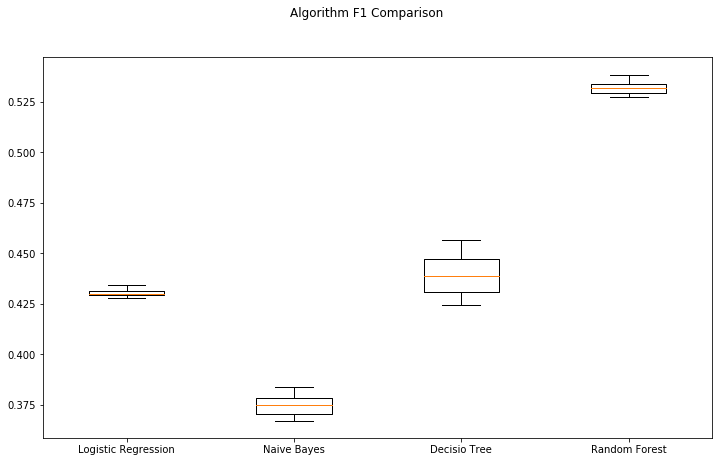

CPU times: user 6h 18min 5s, sys: 2min 3s, total: 6h 20min 8s
Wall time: 10h 45min 45s


In [74]:
%%time
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
results = []
names = []
scoring = 'f1'

models = []
models.append(('Logistic Regression', lr_clf))
models.append(('Naive Bayes', clf_bnb))
models.append(('Decision Tree', dt_clf))
models.append(('Random Forest', rf_clf))

for name, model in models:
    cv_results = cross_val_score(model, X_std, y, cv=cv, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.2f (%.5f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
fig = plt.figure(figsize=(12, 7))
fig.suptitle('Algorithm F1 Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(clf_labels)
plt.show()

#### Section 5 - Perform Statistical Analysis of Model Performance
---
We can look at a ROC curve to evaluate the effectiveness of the models by mapping the True Positive Rate (TPR) against the False Positive Rate (FPR), which would closely model the F1 statisic effectiveness of the various models.  We will also introduce a Majority Vote Ensemble classifier which compares the class outcomes for each instance of the three previous models and uses a majority vote to select the best outcome.  We interpret the ROC AUC curve by judging which model moves up and the left the fastest. 

- The code below was modified for our use, and is based off work by Sebastian Raschka and can be found in *Python for Machine Learning, 2nd edition*

In [75]:
from sklearn.base import BaseEstimator
from sklearn.base import ClassifierMixin
from sklearn.externals import six
from sklearn.base import clone
import operator

class MajorityVoteClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, classifiers, vote = 'classlabel', weights = None):
        self.classifiers = classifiers
        self.vote = vote
        self.weights = weights
      
    def fit(self, X, y):
        if self.vote not in ('probability', 'classlabel'):
            raise ValueError("vote must be 'probability' or 'classlabel'"
                             "; got (vote=%r)"
                             % self.vote)

        if self.weights and len(self.weights) != len(self.classifiers):
            raise ValueError('Number of classifiers and weights must be equal'
                             '; got %d weights, %d classifiers'
                             % (len(self.weights), len(self.classifiers)))
        #self.classes_ = self.classes_
        self.classifiers_ = []
        for clf in self.classifiers:
            fitted_clf = clone(clf).fit(X, y)
            self.classifiers_.append(fitted_clf)
        return self
    
    def predict(self, X):
        if self.vote == 'probability':
            maj_vote = np.argmax(self.predict_proba(X), axis = 1)
        else:
            predictions = np.asarray([clf.predict(X) for clf in self.classifiers_]).T
            maj_vote = np.apply_along_axis(lambda x: np.argmax(np.bincount(x, weights = self.weights)), 
                                       axis = 1, arr = predictions)
        maj_vote = self.inverse_transform(maj_vote)
        return maj_vote

    def predict_proba(self, X):
        probas = np.asarray([clf.predict_proba(X) for clf in self.classifiers_])
        avg_proba = np.average(probas, axis = 0, weights = self.weights)
        return avg_proba
    
    def get_params(self, deep = True):
        if not deep:
            return super(MajorityVoteClassifier, self).get_params(deep = False)
        else:
            out = self.named_classifiers.copy()
            for name, step in six.iteritems(self.named_classifiers):
                for key, value in six.iteritems(step.get_params(deep = True)):
                    out['%s__%s' % (name, key)] = value
            return out

In [76]:
# Define the majority vote classifer with the three previously created models
mv_clf = MajorityVoteClassifier(classifiers = [lr_clf, clf_bnb, dt_clf, rf_clf])

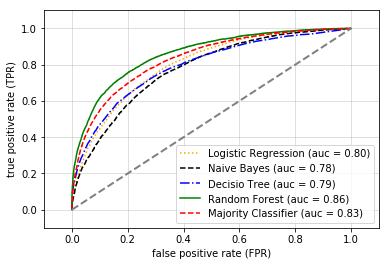

CPU times: user 1h 4min 45s, sys: 25.5 s, total: 1h 5min 10s
Wall time: 1h 4min 48s


In [77]:
%%time
from sklearn.metrics import roc_curve, auc
colors = ['orange', 'black', 'blue', 'green', 'red']
linestyles = [':', '--', '-.', '-', '--']

clf_labels = ['Logistic Regression', 'Naive Bayes', 'Decisio Tree', 'Random Forest', 'Majority Classifier']
all_clf = [lr_clf, clf_bnb, dt_clf, rf_clf, mv_clf]

for clf, label, clr, ls in zip(all_clf, clf_labels, colors, linestyles):
    y_pred = clf.fit (X_train, y_train).predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_true = y_test, y_score = y_pred)
    roc_auc = auc(x = fpr, y = tpr)
    plt.plot(fpr, tpr, color = clr, linestyle = ls, 
             label = '%s (auc = %0.2f)' % (label, roc_auc))

plt.plot([0, 1], [0, 1], linestyle = '--', color = 'gray', linewidth = 2)
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha = 0.5)
plt.xlabel('false positive rate (FPR)')
plt.ylabel('true positive rate (TPR)')
plt.legend(loc = 'lower right')
plt.show()

As we can see above the AUC for Random Forest Model outperforms the remaining individual classifiers and the Majority Vote Classifier by at least 3%.  This does come at a significant computing expense, due to the fact that to achieve this level of performance, the Random Forest Model most fit 650 separate Tree models.  This takes nearly 6 hours to fit on a new Mac Book Pro with 8 cores and 16GB of RAM.   

#### Section 6 - Review Feature Importance

---
We'll first use our recursive feature elimination developed from the mini-lab with our logistic regression model to judge feature importance on the top-30 features.  We'll then compare that to list developed by our decision tree classifier for verification.

In [78]:
#The X_RFE_reduced dataframe is the result of running the Recursive Feature Elimination RFE funciton in sklearn
#during the mini-lab.  This took over 6 hours to run, and in an effort save time, we will look at the top 30 
#developed by that model.
X_RFE_reduced = X[['Previous_Medals','Country_USA', 'Country_Russia','Weight','Year','Sex','Country_Luxembourg','Country_Egypt',
               'Sport_Athletics','Season','Event_Ice  Ice Hockey','Event_ Individual All-Around',
               'Event_ Road Race, Individual','Event_ Rugby','Event_ Floor Exercise','Event_ Horse Vault',
               'Sport_Alpine Skiing','Event_ Team All-Around, Swedish System','Event_ Horizontal Bar',
               'Country_Mexico', 'Event_ Uneven Bars','Event_ Pommelled Horse','Country_Senegal',
               'Event_ Parallel Bars','Event_ Rings','Country_Ireland','Country_Venezuela',
               'Event_ Balance Beam', 'Country_Israel','Event_Sailing Mixed 12 metres','Event_ Lacrosse']]

In [80]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_RFE_reduced, y, test_size = 0.2, 
                                                       random_state = 0, stratify = y)

In [81]:
#Standardize the train and test set
sc = StandardScaler()
sc.fit(X_train1)
X_train_std1 = sc.transform(X_train1)
X_test_std1 = sc.transform(X_test1)

In [82]:
lr2_clf = lr_clf.fit(X_train_std1, y_train1)
# iterate over the coefficients
weights_lr2 = lr2_clf.coef_.T
 # take transpose to make a column vector
variable_names_clf = X_RFE_reduced.columns

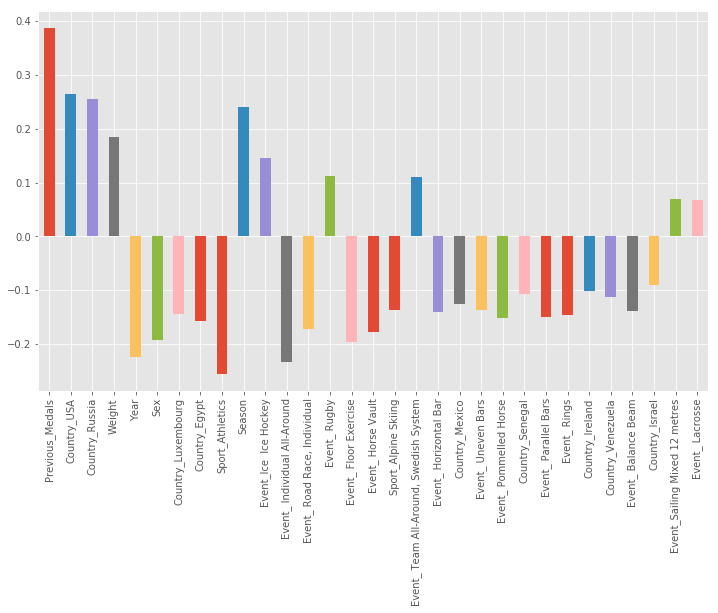

In [83]:
# now let's make a pandas Series with the names and values, and plot them
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

weights = pd.Series(lr2_clf.coef_[0],index=X_RFE_reduced.columns)
weights.plot(kind='bar', figsize = (12, 7))
plt.show()

As expected, the logistic regression model heavily values the `Previous_Medal` when classifying an instance as `Medal` class **1**, with `Country_USA`, `Country_Russia`, and `Season` being the other strong indicators of `Medal` class **1**.  Sports with numerous competitors such as `Sports_Athletics` and Countries with low populations and numbers of athletes, such as `Country_Venezuela` remain strong indicators of class **0**.     

In [84]:
#imp = dict(zip(X.columns, dt_clf.feature_importances_))
#print(imp)

imp = list(zip(rf_clf.feature_importances_, X.columns))
imp.sort(reverse=True)

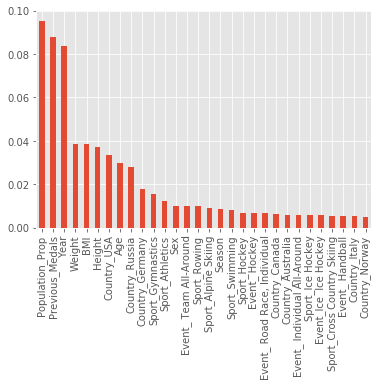

In [85]:
df_imp = pd.DataFrame(imp, index=[x for (_,x) in imp]).head(30).plot(kind='bar', legend = None)

There are numerous repeats of features that were considered important when developing the Random Forest Model, but overwhelmlingly, the Random Forest looked at the `Population_Prop`, `Previous_Medal`, and `Year` features when determining the impurity of a node.  `Sports_Gymnastics` and `Ice_Hockey` are other strong indicator of `Medal` class **1**.  This is in line with the analysis from Lab One when we determined that more Medals have been awarded in `Ice_Hockey` than any other Olympic event.

#### Task 2 - Guessing the Sport Based on Other Olympian Attributes
#### Section 1 - Choosing Performance Metric to evaluate models

---
Predicting the Sport based on the other attributes in the model introduces a multiclass target to the predictor algorithms we have done so far. Given the number of targets it is reasonable to think getting a correct guess for one specific sport will be more difficult due to the amount of noise around the other sports, but since that has the same effect in all of our prediction algorithms it isn't relevant. The real question here is if we should use Precision for a weighted penalty for False Positives (predicting a sport when it was not the actual value), Recall for a weighted penalty for False Negatives (predicting a different sport than the actual value), or avoid weighting the result. In this case we do not see a reason to penalize False Negatives or False Positives since the risk around either is not high, so we will use the harmonic average of the precision and recall, the F-measure, or F1. Because we have many sports with a heavy imbalance in the number of instances of each class, we will use a weighted F1 attribute.

---

$$
Recall = \frac{Sports Identified Correctly}{Sports Identified Correctly + Times Sports was Not Identified Where It Was The Actual Sport}
$$

$$
Precision = \frac{Sports Identified Correctly}{Sports Identified Correctly + Times Sports was Identified Where It Was Not The Actual Sport}
$$

$$
F_{1} = 2 * \frac{precision * recall}{precision + recall}
$$

#### Section 2 - Choosing Method to split test and train datasets
----
Identifying the sport based on the other attributes of the athlete presents its own challenges. The number of athletes by sport vary wildly, with some sports having only 60 athletes (Lacrosse) while the most have over 38,577 athletes (Athletics). With a mean of 4,942 and a standard deviation of 6,966 the risk under-representing our classes and over-fitting is worrisome, so I also think a stratified 10-fold cross validation method is appropriate for the sport prediction. We will use the same train and test data detailed in task 1.

In [86]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=10, test_size = 0.2, random_state=0)
for train_index, test_index in sss.split(X_std_task2, y_enc_task2):
    X_train_task2, X_test_task2 = X_std_task2[train_index], X_std_task2[test_index]
    y_train_task2, y_test_task2 = y_enc_task2[train_index], y_enc_task2[test_index]

#### Section 3 - Creating Models
---
For the task of Guessing the Sport Based on Other Olympian Attributes we will look at the model F1 scores following 10-fold Cross Validation for a Logistic Regression Model, A K-Nearest Neighbors model, and a Random Forest Model. 

In [87]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
import numpy as np
import random
import math
from numpy.random import permutation
from sklearn import metrics as mt
from sklearn.metrics import accuracy_score

- Algorithm 1 (Logistic Regression)
---
We'll perform a GridSearch from the dataset to tune the hyperparameters used in the final cross-validated model. This dataset is smaller than our previous GridsearchCV so a subset was not required.

In [88]:
#This function was taken from Dr. Jake Drew's EducationDataNC Repository and modified for use in this project
cv = StratifiedShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 0)
from sklearn.model_selection import cross_validate

def EvaluateClassifierEstimator(classifierEstimator, X, y, cv):
   
    #Perform cross validation using f1_weighted to decrease the impact of imbalanced classes in the target
    scores = cross_validate(classifierEstimator, X, y, scoring=['accuracy','f1_weighted']
                            , cv=cv, return_train_score=True)

    Accavg = scores['test_accuracy'].mean()
    F1avg = scores['test_f1_weighted'].mean()

    print_str = "The average accuracy for all cv folds is: \t\t\t {Accavg:.5}"
    print_str4 = "The average F1 for all cv folds is: \t\t\t {F1avg:.5}"
    
    print(print_str.format(Accavg=Accavg))
    print(print_str4.format(F1avg=F1avg))
    print('*********************************************************')

    print('Cross Validation Fold Mean Error Scores')
    scoresResults = pd.DataFrame()
    scoresResults['Accuracy'] = scores['test_accuracy']
    scoresResults['F1'] = scores['test_f1_weighted']
    
    print(scoresResults)

- Algorithm 2 (K-Nearest Neighbors)
---
For K-Nearest Neighbors we will explore the optimum number of KNN to target given our sample data and AUC scores, then we will run the analysis on the full dataset using the number of neighbors identified.

In [93]:
%%time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
import numpy as np
import random
import math
from numpy.random import permutation
from sklearn import metrics as mt
from sklearn.metrics import accuracy_score 
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report


#test if the data are sparse
import scipy
print('Is X_train sparse? ', scipy.sparse.issparse(X_train_task2))
print('Is X_test sparse? ', scipy.sparse.issparse(X_test_task2))
print('Is y_train sparse? ', scipy.sparse.issparse(y_train_task2))
print('Is y_test sparse? ', scipy.sparse.issparse(y_test_task2))

Is X_train sparse?  False
Is X_test sparse?  False
Is y_train sparse?  False
Is y_test sparse?  False
CPU times: user 635 µs, sys: 501 µs, total: 1.14 ms
Wall time: 702 µs


First we'll look to determine our classes.

In [94]:
def per_class_accuracy(ytrue,yhat):
    conf = mt.confusion_matrix(ytrue,yhat)
    norm_conf = conf.astype('float') / conf.sum(axis=1)[:, np.newaxis]
    return np.diag(norm_conf)

def plot_class_acc(ytrue,yhat, title=''):
    acc_list = per_class_accuracy(ytrue,yhat)
    plt.bar(range(len(acc_list)), acc_list)
    plt.xlabel('Class value (one per face)')
    plt.ylabel('Accuracy within class')
    plt.title(title+", Total Acc=%.1f"%(100*mt.accuracy_score(ytrue,yhat)))
    plt.grid()
    plt.ylim([0,1])
    plt.show()

First we will use our small sample to get an idea for a good range of nearest neighbors to use, then perform our full analysis on the full dataset using our identified number of nearest neighbors.

In [95]:
neighbors = list(range(2, 10))
train_results = []
test_results = []
for n in neighbors:
    # Create the knn model.
    # Look at the five closest neighbors.
    knn = KNeighborsClassifier(n_neighbors=n)
    # Fit the model on the training data.
    knn.fit(X_train_task2, y_train_task2)
    # Make point predictions on the test set using the fit model.
    yhat = knn.predict(X_test_task2)
    print('The accuracy for KNN=',n,' is ', accuracy_score(y_test_task2, yhat))

The accuracy for KNN= 2  is  0.306478637252
The accuracy for KNN= 3  is  0.375034906451
The accuracy for KNN= 4  is  0.250069812901
The accuracy for KNN= 5  is  0.295168947221
The accuracy for KNN= 6  is  0.215023736386
The accuracy for KNN= 7  is  0.249371683887
The accuracy for KNN= 8  is  0.190170343479
The accuracy for KNN= 9  is  0.217118123429


We tend to see a little bit of a sweet spot for accuracy of KNN around 3 and 5, with diminishing returns after that. For our analysis we will pick our best score of KNN=3.

The accuracy for KNN=3 is  0.375034906451


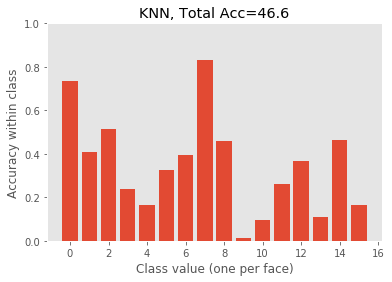

             precision    recall  f1-score   support

          0       0.78      0.73      0.76      1693
          1       0.56      0.45      0.50      1310
          2       0.63      0.49      0.55       702
          3       0.52      0.42      0.46       816
          4       0.40      0.17      0.24        72
          5       0.51      0.33      0.40       141
          6       0.47      0.32      0.38       486
          7       0.83      0.81      0.82       403
          8       0.58      0.51      0.54       468
          9       0.69      0.60      0.64       173
         10       0.51      0.18      0.27       228
         11       0.36      0.10      0.15        52
         12       0.00      0.00      0.00        29
         13       0.62      0.46      0.53        52
         14       0.45      0.31      0.37       132
         15       0.51      0.32      0.39       318
         16       0.70      0.64      0.67      2274
         17       0.39      0.23      0.29   

In [96]:
%%time

# Create the knn model.
# Look at the five closest neighbors.
knn = KNeighborsClassifier(n_neighbors=3)
# Fit the model on the training data.
knn.fit(X_train_task2, y_train_task2)
# Make point predictions on the test set using the fit model.
yhat = knn.predict(X_test_task2)

print('The accuracy for KNN=3 is ', accuracy_score(y_test_task2, yhat))

plot_class_acc(y_test_task2.argmax(axis=1),yhat.argmax(axis=1),title="KNN")

print(classification_report(y_test_task2, yhat))

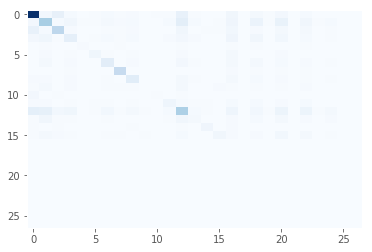

In [97]:
cm = mt.confusion_matrix(y_test_task2.argmax(axis=1),yhat.argmax(axis=1))
plt.imshow(cm,cmap=plt.get_cmap('Blues'),aspect='auto')
plt.grid(False)

- Algorithm 3 (Random Forest)

The accuracy for Random Forest with max_depth=50, n_estimators=150 classifiers is  0.4117564926


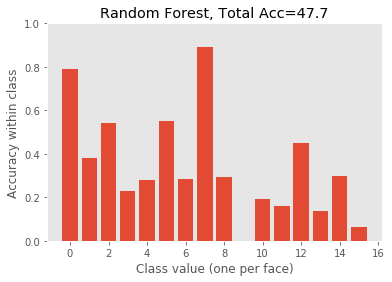

             precision    recall  f1-score   support

          0       0.87      0.79      0.83      1693
          1       0.85      0.47      0.60      1310
          2       0.90      0.52      0.66       702
          3       0.90      0.49      0.64       816
          4       0.95      0.28      0.43        72
          5       0.94      0.55      0.70       141
          6       0.82      0.26      0.39       486
          7       0.97      0.84      0.90       403
          8       0.79      0.37      0.50       468
          9       0.84      0.49      0.62       173
         10       0.93      0.25      0.39       228
         11       0.77      0.19      0.31        52
         12       0.00      0.00      0.00        29
         13       0.95      0.79      0.86        52
         14       0.76      0.17      0.27       132
         15       0.85      0.20      0.33       318
         16       0.88      0.71      0.79      2274
         17       0.90      0.33      0.49   

In [98]:
%%time
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 150 decision trees
rf = RandomForestClassifier(max_depth=50, n_estimators=150, n_jobs=-1)
# Train the model on training data
rf.fit(X_train_task2, y_train_task2);
# Make point predictions on the test set using the fit model.
yhat = rf.predict(X_test_task2)

print('The accuracy for Random Forest with max_depth=50, n_estimators=150 classifiers is ', accuracy_score(y_test_task2, yhat))

plot_class_acc(y_test_task2.argmax(axis=1),yhat.argmax(axis=1),title="Random Forest")
print(classification_report(y_test_task2, yhat))

The accuracy for Random Forest with max_depth=50, n_estimators=150 classifiers is  0.412314995811


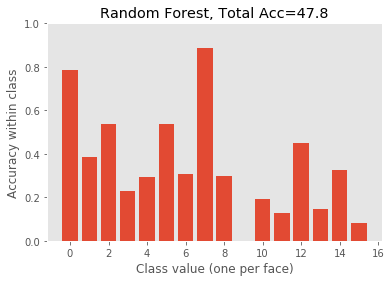

             precision    recall  f1-score   support

          0       0.87      0.79      0.82      1693
          1       0.86      0.47      0.61      1310
          2       0.90      0.51      0.65       702
          3       0.91      0.50      0.64       816
          4       1.00      0.29      0.45        72
          5       0.93      0.54      0.68       141
          6       0.82      0.27      0.41       486
          7       0.96      0.84      0.89       403
          8       0.80      0.37      0.50       468
          9       0.86      0.49      0.62       173
         10       0.96      0.24      0.38       228
         11       0.83      0.19      0.31        52
         12       0.00      0.00      0.00        29
         13       0.95      0.79      0.86        52
         14       0.79      0.17      0.27       132
         15       0.82      0.19      0.30       318
         16       0.88      0.71      0.79      2274
         17       0.90      0.34      0.49   

In [101]:
%%time
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 150 decision trees
rf = RandomForestClassifier(max_depth=50, n_estimators=250, n_jobs=-1)
# Train the model on training data
rf.fit(X_train_task2, y_train_task2);
# Make point predictions on the test set using the fit model.
yhat = rf.predict(X_test_task2)

print('The accuracy for Random Forest with max_depth=50, n_estimators=150 classifiers is ', accuracy_score(y_test_task2, yhat))

plot_class_acc(y_test_task2.argmax(axis=1),yhat.argmax(axis=1),title="Random Forest")
print(classification_report(y_test_task2, yhat))

After tuning the Random Forest Algorithm with different max-depth and n_estimators we did not see an appreciable difference in going above 150 n_estimators and a max_depth of 50, but there was a significant time impact. As such, we settled on max_depth=50, n_estimators=150 as a balance between performance and how thorough the algorithm is. 

Note: The classes that performed the best in this model were Gymnastics and Alpine Skiing. These classes are for some reason easier to predict, which we will cover in Section 6.

Random Forest confusion matrix


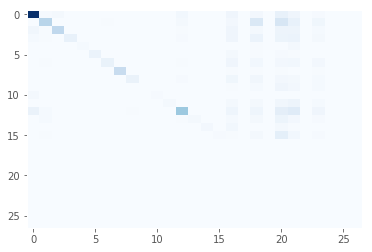

In [100]:
print('Random Forest confusion matrix')
cm = mt.confusion_matrix(y_test_task2.argmax(axis=1),yhat.argmax(axis=1))
plt.imshow(cm,cmap=plt.get_cmap('Blues'),aspect='auto')
plt.grid(False)

#### Section 4 - Evaluating Model Performance
---
From our 3 models, the Random Forest performed the best with an average F-Measure of .74, compared to .49 for K-Nearest Neighbors and a best performance of .48 from the linear regression model. The accuracy for these models were all very low, but given the large number of classes this isn't completely unexpected. Random Forest also performed the best with an accuracy of .417, KNN performed the next best with accuracy at .113 and Logistic Regression at .030. Because F-Measure is our preferred metric we will prefer the Random Forest model from our tests. There is a boxplot below that summarizes these data. Logistic regression was the lowest performer but with the least amount of variance, KNN was left-skewed with high variance and Random Forest was right-skewed with medium variance. This gives Random Forest another advantage over KNN if variance of results is a major concern, but since logistic regression is so innacurate it still isn't a very attractive option.


|      Model    |  Mean F1   | Mean Acc      | 
| ------------- | -----------| ------------- |
|      KNN      |  0.49      |   0.113       |
| Random Forest |  0.74      |   0.414       |

#### Section 5 - Perform Statistical Analysis of Model Performance
---
For the task 2 of classifying the sports based on other attributes the multilabel nature of our target prohibits using a ROC Curve to validate the efficacy of our models. The box plots above already demonstrates that it is the superior model with a 95% level of confidence, but we will run the numerical analysis just to be sure.

In [102]:
%%time
knn1 = cross_validate(knn, X_task2, y_task2, scoring= ['f1_weighted'], cv=cv)
rf1 = cross_validate(rf, X_task2, y_task2, scoring= ['f1_weighted'], cv=cv)

t = 2.26 / np.sqrt(10)

#Create dbar and stdtot for KNN and Random Forest
e3 = (1 - knn1['test_f1_weighted']) - (1 - rf1['test_f1_weighted'])
stdtot3 = np.std(e3)
dbar3 = np.mean(e3)

print('Average of all Folds for KNN: %.2f' % np.mean(knn1['test_f1_weighted']))
print('Average of all Folds for Random Forest: %.2f' % np.mean(rf1['test_f1_weighted']))

knnbar = np.mean(knn1['test_f1_weighted'])
knndev = np.std(knn1['test_f1_weighted'])

rfbar = np.mean(rf1['test_f1_weighted'])
rfdev = np.std(rf1['test_f1_weighted'])

print('KNN has a 95 percent confidence interval of: [ %.3f, %.3f' % (knnbar-t*knndev, knnbar+t*knndev), ']')
print('Random Forest has a 95 percent confidence interval of: [ %.3f, %.3f' % (rfbar-t*rfdev, rfbar+t*rfdev), ']')

print('KNN and Random Forest have a range of: %.3f, %.3f' % (dbar3-t*stdtot3, dbar3+t*stdtot3))

Average of all Folds for KNN: 0.35
Average of all Folds for Random Forest: 0.57
KNN has a 95 percent confidence interval of: [ 0.352, 0.356 ]
Random Forest has a 95 percent confidence interval of: [ 0.567, 0.573 ]
KNN and Random Forest have a range of: 0.213, 0.220
CPU times: user 11min 27s, sys: 1min 2s, total: 12min 29s
Wall time: 3min 6s


In our cross-validation Linear Regression actually goes ahead of KNN in terms of the F-Measure. I'm not sure exactly why that is, but it might be evidence that we over-fit our KNN model and our linear regression model was a better representation of our dataset... Either way, Random Forest again comes out ahead with a 95% confidence interval above the other two methods, so we can reject the null hypothesis that the mean of the F-Measure of the Random Forest method is less than or equal to the other two methods, and accept the alternative hypotheses that the mean of the F-Measure of the Random Forest method is greater than the other two prediction methods.

#### Section 6 - Review Feature Importance
---
Focusing on our Random Forest classification, we will use a pandas dataframe to rank our features that contributed most highly to our classification.

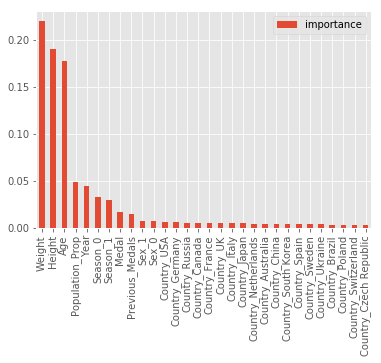

In [103]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_task2.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

feature_importances.head(30).plot(kind='bar')

As we might have expected, height, weight, and age play a major part in deciding which sport you can participate in. In addition, the sports that had the best performance in our model were gymnastics and alpine skiing, both of which seem to require a certain kind of body build and age range in order to compete.
After that we had a bit of a surprise when we saw that the proportional population of your country was also a key indicator of your sport. One possibility to explain this is that countries with higher populations tend to have more datapoints in the sports they participate in. Also certain countries, like warmer countries, might not participate in winter sports giving us a better chance of predicting their correct sport. After that the year was a good help in predicting the sport, likely because body types, countries, and sports change from year to year, especially now that we have split the year Summer and Winter olympics are held.

### Deployment

---

These predictions could be used for predicting medal winners in future Olympics based on variables such as `BMI`, `Height`, `Weight`, or `Sex`; however, this is a bit impractical due to the lack of discernable difference in skillset. Individuals with similar characteristics do not necessarily perform the same. To make podium predictions more useful we would need a skill level metric, but skill levels change over time. Consequently, this data set is better served for informational or educational purposes.

To teach an individual or organization about <i>data science</i>, <i>machine learning</i>, or <i>data mining</i> we must first produce something relatable and <u>this</u> data set is something people understand, so as we explain what classifications we are making the content becomes understandable. From there we can dive into data that is more relavent to that individual or organization.

Binary and multinomial classification have numerous use cases across industries. For example:

| Industry      | Use Case                |
| ------------- | ----------------------- |
| Advertising   | Targeted advertising    |
| Energy        | Prediction of dry well  |
| Manufacturing | Risk of machine failure |
| Sports        | Run or pass in football |
| Telecom       | Customer retention      |
| Underwriting  | Risk level of borrower  |

To <b>measure the value</b> of any prediction model we would first need to determine if the model classifies better than best guess. If so we would need to develop a business case to understand the cost implications. To do this we would quantify risk reduction, revenue increases, changes in working capital, and/or cost decreases that were a direct result of the model. Next we would determine the cost of implementing the model and perform a discounted cash flow analysis to ensure there was a positive net present value.

This type of model could be useful for predicting what sport someone may be best suited to play. Attributes could be inputs that lead to a recommended sport for a person of a particular `Age`, `Height`, `Weight`, `BMI`, `Sex`, and `Country`. More broadly, to <b>deploy</b> a model under any of the aforementithis type of model could be useful for predicting what sport someone may be best suited to play. oned use cases we would need to understand the architecture environment and determine how to use APIs to connect to the classification model. Once this is established the predictor could be integrated with an existing system or set up on a clean build.

It may take many hours to <b>train</b> a prediction model, so it would be impractical to retrain a model in real-time using a relational database. Instead, the frequency for updating the prediction model would need to be determined by the nature of the use case. Using the telecom example from above, customer retention prediction models would likely run monthly to align with billing and usage limits. For the Olympics, this model could be updated annually/seasonally with each World Championship or every two years after the Olympic Games.

### Exceptional Work

---

### Automated Search for Optimal Parameters using Evolutionary Algorithms.

**All Ideas in this section were completed with the help of the following resources**

- [What is an Evolutionary Algorithm](https://www.cs.vu.nl/~gusz/ecbook/Eiben-Smith-Intro2EC-Ch2.pdf)
- [How to decode a binary](https://www.wikihow.com/Decode-Binary-Numbers)
- [Introduction To Genetic Algorithms & Example Code](https://towardsdatascience.com/introduction-to-genetic-algorithms-including-example-code-e396e98d8bf3)


**Why take this approach?**

Grid Search has been used in order to search for parameters in most machine learning problems. The problem with Gridsearch is it only tries a small subset of parameters that can be used to fit models. Grid search does not find the most optimal, or near optimal solution because it does not search enough parameters to know whether or not it has reached an optimal solution. For this reason we decided to develop a framework using an Evolutionary approach to finding optimal or near optimal for hyper parameters regardless of the model.

`Benefits of Evolutionary Algorithms`: Evolutionary algorithms try a LARGE amount of parameter values which can dwarf the amount of parameters that Gridsearch tries. Each time the algorithm repeats it selects only the best solutions that best maximizes, or minimizes the objective function and passes that information to the next generation to find the best parameters in the new generation. This generational cycle of locating the best parameters continue until the most optimal, or near optimal solution has been found. In short...

1. Tries more values than grid search
2. Only considers the best values, and from those values create even better values.
3. Can be used for ANY ML algorithm that has hyperparameters.

#### How the algorithm works

The rules for the algorithm is straight forward. In our case we want to find the best parameters for a model that help us MINIMIZE our objective function. Our objective function is our model's error rate. We would like to find parameters for models that best predict podium finishers with the smallest amount of error.

![Genetic Algorithm Image](images/genetic_algorithm.png "Title")

Taking this approach to parameter search ensures that we are left with only the best of the best solutions and the even better we don't have to manualy perform the searches ourselves.

#### The Goal

In order to start the algorithm we first must determine what we would like to search for. In this example, we will use the `Bernoulli Naive Bayes` model as it was found to be our best performing model at 83% accuracy. Our goal however, is to determine if we can do better than our grid search.

The `Bernoulli Naive Bayes` has 2 hyperparameters that a user must select in order to perform a fit on the model. The issue here is that we have no clue which ones to try, and how they will affect our results. This is where the genetic algorithm can help us. We will use the genetic algorithm in order to find $\alpha$ and $\beta$ which will represent our two hyper parameters `ALPHA` and `BINARIZE` values. We would like to find the best of these two values that will give us the lowest error rate for this model.

#### Representing Alpha and Binarize as binaries

In order to begin our search we will start with vector of 30 slots. This vector will have 15 slots that represent the $\alpha$ chromosome and 15 slots that represent the $\beta$ or Binarize chromosome.

![Parameter Representation](images/vector_rep.png "Title")

The inital states for the parameters will be represented as a random binary to the algorithm, and the algorithms job will be to find the best binary representation that best fits our objective function which is minimizing model error.

#### Implementation

Next, we will see a detailed implementation of our framework.

In [1]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.naive_bayes import BernoulliNB
from multiprocessing import Pool
from tqdm import tqdm

/Users/osknowsys/anaconda3/envs/olympics/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


In [2]:
data = pd.read_csv("data/pop_merge.csv",index_col=False)
data = data.sample(frac=1)

y = data['Medal']
X = data.drop(['Medal', 'Unnamed: 0'], axis = 1)

X = pd.get_dummies(X, columns = ['Country', 'Event', 'Sport'])

sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

Above, we find our olympic dataset and prepare our variables. We normalize all our numeric values, and create dummy variables for our qualitative variables.

In [3]:
starting_gene = np.array([1,1,1,1,0,0,1,0,1,0,0,1,0,1,1,1,1,1,0,0,1,1,1,1,0,0,1,0,1,0])

Above our starting gene will be our random binary representation of both hyper parameters as one vector. Each hyper parameter will be represented by 15 bits each.

In order for our algorithm to work we will need several values created in order to keep track of the progress. Below is a description of values our framework uses...

`Probability Of Crossover`: This is the probability that a solution should be crossover with another solution. We want this to always happen so it is 1.

`Probability of Mutation`: This is the probability that there will be a change to a given solution. We want this value to be do to random chance, so in order to mutate the random chance must be greater than a value of `0.2`.

`Population`: This represents the number of random solutions that will be generated for each generation. Our algorithm selects solutions from this group.

`Generation`: This is the number of generations that our algorithm needs to try to find a good solution. This can be as high as we want, but compute resources need to be really good in order to handle a large number of generations. in our case we will only look for solutions for `10` generations.

`kfold`: The number of folds to use in the training process. We will set this to 3.

`range for alpha`: This is the search range we would like our algorithm to search in. This can be as wide as we want it as there are many solutions that will be explored. In our case we use values that make sense for alpha from `0.0` to `1.0`.

`range for binarize`: This is the search range we would like our algorithm to search in for binarize. `0.0` to `1.01`.

`X`: The dataset

`y`: the target in this case podium finish or no podium finish

`L`: The total length of the chromosome binary vector

`Winners`: The list of the best results found throughout all the generations

`chromosome_number`: counter for the number of pairs that were created.

`gen_number`: counter for the the number of generations.

In [4]:
algo_information = {
        'ProbabilityOfCrossover': 1,
        'ProbabilityOfMutation': 0.2,
        'Population': 30,
        'Generation': 10,
        'kfold': 3,
        'gene': starting_gene,
        'range_for_alpha': (0.0, 1.0),
        'range_for_binarization': (0.0, 1.0),
        'L': len(X),
        'X': X,
        'Y': y,
        'Winners': [],
        'chromosome_number': 1,
        'gen_number': 1
        }

Our first step is to initialize a population of random solutions. In our case this is a random amount binary values for $\alpha$ and binarize $\beta$.

In [5]:
def create_chromosomes_from(algo_info):
    """
    Takes the starting chromosome bit string, and creates a group of chromosome
    replicas, based on the population amount
    
    Parameters
    ----------
    
    `algo_info`: <dict> algorithm information
    
    Return
    ------
    
    [chromosomes]
    
    """
    print("Created chromosome # ", algo_info['chromosome_number'])
    print("IN GENERATION #", algo_info['gen_number'])
    pop = algo_info['Population']
    n_list = np.empty((0, len(algo_info['gene'])))
    for i in range(pop):
        rd.shuffle(algo_info['gene'])
        n_list = np.vstack((n_list, algo_info['gene']))
    algo_info['chromosome_number'] += 1
    if "NewPopulation" in algo_info.keys():
        rd.shuffle(algo_info['NewPopulation'])
        newpop = np.vstack((n_list, algo_info['NewPopulation']))
        return newpop 
    else:    
        return n_list

Our binaries need a way to be converted into actual numbers that humans can read so that we can use them in our model. So we created a way to decode binaries back into whole numbers with the appropriate precision.

In [6]:
def decode_chromosome(a, b, param_as_bit):
    """
    This function is design to decode a chromosome. It is derived from the formula
    above, and needs a upper range and a lower range given so that it can decode
    the binary bit string and return a decoded value.
    
    Parameters
    ---------
    
    `a` <float/int>lower value of the desired search space
    `b`<float/int> high end of the search space.
    `params_as_bit`<list> a list of ones and zeros representing the parameter as
    a binary chromosome.
    
    Return
    ------
    
    <float> Decoded Chromosome
    """
    l = len(param_as_bit)
    precision = (b - a) / ((2**l) - 1)
    z = 0
    t = 1
    num_sum = 0
    
    for i in range(l):
        num = param_as_bit[-t]*2**z
        num_sum += num
        t += 1
        z += 1
        
    decoded_value = (num_sum*precision) + a
    return decoded_value

In order for us to determine the best solution we need to have a selection process. Our selection process consists of the top 3 solutions or chromosomes that reduce the error of the model the most. These top 3 models are selected for a chance to go through crossover and mutation.

In [7]:
 def selection(algo_info):
    """
    This function runs the selection criteria from the group of different chromosomes
    in which the problem is centered. It grabs random indexes from the chromosomes and
    selects those genes and returns them ass candidates. In this case we are testing
    3 folds, so 3 candidates are returned.
    
    Parameter
    --------
    `algorithm information`: <dict> map containing all the starting info for the algo
    
    Return
    ------
    
    candidates: <list>
    """
    chromosomes = create_chromosomes_from(algo_info)
    indexes = np.unique(np.random.randint(0, len(chromosomes), size=3))
    while len(indexes) < 3:
        indexes = np.unique(np.random.randint(0, len(chromosomes), size=3))
        if len(indexes) == 3:
            break
    [w1, w2, w3] = indexes 
    warrior_1 = chromosomes[w1]
    warrior_2 = chromosomes[w2]
    warrior_3 = chromosomes[w3]
    candidates = [warrior_1, warrior_2, warrior_3]
    return candidates

In order to know if a candidate was good or not we need to calculate a fitness value. In our fitness value function does just that.

In [8]:
def fitness_value(algo_info):
    """
    Calculates the fitenss values for alpha and binarize for each participant in the 
    selection process. This function returns the candidate gene and its associated
    decoded value to the user for alpha and binarize
    
    Parameter
    --------
    `algorithm_informaiton`: <dict> information about algorithm.
    
    Return
    ------
    [{values}]: <list>
    """
    candidates = selection(algo_info)
    values = []
    
    for candidate in candidates:
        alpha_chromosome = candidate[0:-15]
        binarize_chromosome = candidate[15:len(candidate)]
        alpha_a = algo_info['range_for_alpha'][0]
        alpha_b = algo_info['range_for_alpha'][1]
        binarize_a = algo_info['range_for_binarization'][0]
        binarize_b = algo_info['range_for_binarization'][1]
        decoded_alpha = decode_chromosome(alpha_a, alpha_b , alpha_chromosome)
        decoded_binarize = decode_chromosome(binarize_a, binarize_b, binarize_chromosome)
        info = dict(Gene=candidate, Alpha=decoded_alpha, Binarize=decoded_binarize)
        values.append(info)
    return values

Our fitness function is to determine which values produce the lowest error for our dataset given the Bernoulli Naive Bayes model. We can't just simply take face value because we are doing this fitness test across multiple folds of the data. As a result we will take the average of all the folds and use that final value as the fitness measure.

In [9]:
def fitness(algo_info):
    """
    This function is the objective function which calculates the svm error for
    the specific gene. It returns each gene with its error function on the model.
    This giives a good idea of hor the decoded alpha & binarize value performed within
    the model.
    
    Parameter
    --------
    `algorithm_informaiton`: <dict> information about algorithm.
    
    Return
    ------
    [{values}]: <list>
    """
    values = fitness_value(algo_info)
    X = algo_info['X']
    Y = algo_info['Y']
    
    for value in values:
        kf = KFold(algo_info['kfold'])
        sum_of_scores = 0
        for train_index, test_index in kf.split(X):
            print("TRAIN:", train_index, "TEST: ", test_index)
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = Y[train_index], Y[test_index]
            model = BernoulliNB(alpha=value['Alpha'], binarize=value['Binarize'])
            model.fit(X_train, y_train)
            model.predict(X_test)
            accuracy = model.score(X_test, y_test)
            gene_best_value = 1 - (accuracy)
            sum_of_scores += gene_best_value
        performance = sum_of_scores/algo_info['kfold']
        value['error'] = performance
    best_values = tournament_selection(values)
    return best_values

Only the best values get to compete to go into our crossover lottery. So our next function of the framework is designed to use the tournament style selection where the best values that lower the error rate are considered as parents.

In [10]:
def tournament_selection(fitness_values):
    parent_1_index = min(range(len(fitness_values)), key=lambda index: fitness_values[index]['error'])
    parent_1 = fitness_values[parent_1_index]
    del fitness_values[parent_1_index]
    parent_2_index = min(range(len(fitness_values)), key=lambda index: fitness_values[index]['error'])
    parent_2 = fitness_values[parent_2_index]
    del fitness_values[parent_2_index]
    parents = [parent_1, parent_2]
    return parents

The parents (or best solutions) go through a crossover process. This crossover process is simply a small exchange between the two best solutions. It is important that these changes are slight so as to not deviate too far from whatever that best value was for the parents. This crossover creates exchange of information only involving the best traits from the parents. A diagram is listed below to illustrate....

![Crossover Representation](images/crossover_image.png "Title")

In [11]:
def crossover(algo_info):
    parents = fitness(algo_info)
    algo_info['Winners'].append(parents[0])
    parent_1 = parents[0]['Gene']
    parent_2 = parents[1]['Gene']
    prob = np.random.rand()
    if prob < algo_info['ProbabilityOfCrossover']:
        cross_section_1 = np.random.randint(0, len(algo_info['gene']))
        cross_section_2 = np.random.randint(0, len(algo_info['gene']))
        
        while cross_section_1 == cross_section_2:
            cross_section_2 = np.random.randint(0, len(algo_info['gene']))
        if cross_section_1 < cross_section_2:
            middle_segment_1 = parent_1[cross_section_1:cross_section_2+1]
            middle_segment_2 = parent_2[cross_section_1:cross_section_2+1]
            
            first_segment_1 = parent_1[:cross_section_1]
            second_segment_1 = parent_1[cross_section_2+1:]
            
            first_segment_2 = parent_2[:cross_section_1]
            second_segment_2 = parent_2[cross_section_2+1:]
            
            child_1_gene = np.concatenate([first_segment_1, middle_segment_1, second_segment_1]) 
            child_2_gene = np.concatenate([first_segment_2, middle_segment_2, second_segment_2])
        else:
            middle_segment_1 = parent_1[cross_section_2:cross_section_1+1]
            middle_segment_2 = parent_2[cross_section_2:cross_section_1+1]
            
            first_segment_1 = parent_1[:cross_section_2]
            second_segment_1 = parent_1[cross_section_1+1:]
            
            first_segment_2 = parent_2[:cross_section_2]
            second_segment_2 = parent_2[cross_section_1+1:]
            
            child_1_gene = np.concatenate([first_segment_1, middle_segment_1, second_segment_1]) 
            child_2_gene = np.concatenate([first_segment_2, middle_segment_2, second_segment_2])
        return(child_1_gene, child_2_gene)
    else:
        child_1_gene = parent_1
        child_2_gene = parent_2
        return[child_1_gene, child_2_gene]
        

This crossover produces entirely new solutions, or genes which can be randomly tried for a mutation. The mutation is determined by random chance. In our case there is only a 20% chance there will be a mutation. If the chance of mutation is greator than 20% then each value in the binary gen will be changed. If it was 1 it will become a 0. If 0 it will become a one. This process will give an entirely mutated solution to try in the next generation.

![Mutation Representation](images/mutation.png "Title")

In [12]:
def mutate(algo_info):
   children =  crossover(algo_info)
   index = 0
   for child in children:
       for i in child:
           prob = np.random.rand()
           if prob < algo_info['ProbabilityOfMutation']:
               if child[index] == 0:
                   child[index] = 1
               else:
                   child[index] = 0
               index += 1
           else:
               pass
   return children

Our execution function takes all these ideas in consideration and can be coded as the following...

In [13]:
def execute(algo_info):
    print("EXECUTING GENTIC ALGO, In search for the best parameters.....")
    for i in tqdm(range(algo_info['Generation'])):
        algo_info['NewPopulation'] = np.empty((0,len(algo_info['gene'])))
        print("GENERATION # ", algo_info['gen_number'])
        for j in range(int(algo_info['Population']/2)):
            child1, child2 = mutate(algo_info)
            algo_info['NewPopulation'] = np.vstack((child1, child2, algo_info['NewPopulation']))        
        algo_info['gen_number'] += 1
        print("STARTING GENERATION #", algo_info['gen_number'])
    best_index = min(range(len(algo_info['Winners'])), key=lambda index: algo_info['Winners'][index]['error'])
    print("GENETIC ALGORITHMS BEST PARAMETERS AFTER GENERATION: ", algo_info['gen_number'])
    print(algo_info['Winners'][best_index])

Finally, our search takes a long time if the work is not parallelized. In an effort to speed up the search process we parallelized the work so that our search could make use of mutiple processes on the machine. The next grid executes our algorithm.

In [14]:
with Pool(processes=algo_information['Population']) as pool:
    pool.map(execute, [algo_information])

EXECUTING GENTIC ALGO, In search for the best parameters.....


  0%|          | 0/10 [00:00<?, ?it/s]

GENERATION #  1
Created chromosome #  1
IN GENERATION # 1
TRAIN: [ 88950  88951  88952 ... 266845 266846 266847] TEST:  [    0     1     2 ... 88947 88948 88949]
TRAIN: [     0      1      2 ... 266845 266846 266847] TEST:  [ 88950  88951  88952 ... 177896 177897 177898]
TRAIN: [     0      1      2 ... 177896 177897 177898] TEST:  [177899 177900 177901 ... 266845 266846 266847]
TRAIN: [ 88950  88951  88952 ... 266845 266846 266847] TEST:  [    0     1     2 ... 88947 88948 88949]
TRAIN: [     0      1      2 ... 266845 266846 266847] TEST:  [ 88950  88951  88952 ... 177896 177897 177898]
TRAIN: [     0      1      2 ... 177896 177897 177898] TEST:  [177899 177900 177901 ... 266845 266846 266847]
TRAIN: [ 88950  88951  88952 ... 266845 266846 266847] TEST:  [    0     1     2 ... 88947 88948 88949]
TRAIN: [     0      1      2 ... 266845 266846 266847] TEST:  [ 88950  88951  88952 ... 177896 177897 177898]
TRAIN: [     0      1      2 ... 177896 177897 177898] TEST:  [177899 177900 177

TRAIN: [     0      1      2 ... 266845 266846 266847] TEST:  [ 88950  88951  88952 ... 177896 177897 177898]
TRAIN: [     0      1      2 ... 177896 177897 177898] TEST:  [177899 177900 177901 ... 266845 266846 266847]
TRAIN: [ 88950  88951  88952 ... 266845 266846 266847] TEST:  [    0     1     2 ... 88947 88948 88949]
TRAIN: [     0      1      2 ... 266845 266846 266847] TEST:  [ 88950  88951  88952 ... 177896 177897 177898]
TRAIN: [     0      1      2 ... 177896 177897 177898] TEST:  [177899 177900 177901 ... 266845 266846 266847]
TRAIN: [ 88950  88951  88952 ... 266845 266846 266847] TEST:  [    0     1     2 ... 88947 88948 88949]
TRAIN: [     0      1      2 ... 266845 266846 266847] TEST:  [ 88950  88951  88952 ... 177896 177897 177898]
TRAIN: [     0      1      2 ... 177896 177897 177898] TEST:  [177899 177900 177901 ... 266845 266846 266847]
Created chromosome #  10
IN GENERATION # 1
TRAIN: [ 88950  88951  88952 ... 266845 266846 266847] TEST:  [    0     1     2 ... 8894

 10%|█         | 1/10 [10:37<1:35:35, 637.23s/it]

GENERATION #  2
Created chromosome #  16
IN GENERATION # 2
TRAIN: [ 88950  88951  88952 ... 266845 266846 266847] TEST:  [    0     1     2 ... 88947 88948 88949]
TRAIN: [     0      1      2 ... 266845 266846 266847] TEST:  [ 88950  88951  88952 ... 177896 177897 177898]
TRAIN: [     0      1      2 ... 177896 177897 177898] TEST:  [177899 177900 177901 ... 266845 266846 266847]
TRAIN: [ 88950  88951  88952 ... 266845 266846 266847] TEST:  [    0     1     2 ... 88947 88948 88949]
TRAIN: [     0      1      2 ... 266845 266846 266847] TEST:  [ 88950  88951  88952 ... 177896 177897 177898]
TRAIN: [     0      1      2 ... 177896 177897 177898] TEST:  [177899 177900 177901 ... 266845 266846 266847]
TRAIN: [ 88950  88951  88952 ... 266845 266846 266847] TEST:  [    0     1     2 ... 88947 88948 88949]
TRAIN: [     0      1      2 ... 266845 266846 266847] TEST:  [ 88950  88951  88952 ... 177896 177897 177898]
TRAIN: [     0      1      2 ... 177896 177897 177898] TEST:  [177899 177900 17

TRAIN: [     0      1      2 ... 266845 266846 266847] TEST:  [ 88950  88951  88952 ... 177896 177897 177898]
TRAIN: [     0      1      2 ... 177896 177897 177898] TEST:  [177899 177900 177901 ... 266845 266846 266847]
TRAIN: [ 88950  88951  88952 ... 266845 266846 266847] TEST:  [    0     1     2 ... 88947 88948 88949]
TRAIN: [     0      1      2 ... 266845 266846 266847] TEST:  [ 88950  88951  88952 ... 177896 177897 177898]
TRAIN: [     0      1      2 ... 177896 177897 177898] TEST:  [177899 177900 177901 ... 266845 266846 266847]
TRAIN: [ 88950  88951  88952 ... 266845 266846 266847] TEST:  [    0     1     2 ... 88947 88948 88949]
TRAIN: [     0      1      2 ... 266845 266846 266847] TEST:  [ 88950  88951  88952 ... 177896 177897 177898]
TRAIN: [     0      1      2 ... 177896 177897 177898] TEST:  [177899 177900 177901 ... 266845 266846 266847]
Created chromosome #  25
IN GENERATION # 2
TRAIN: [ 88950  88951  88952 ... 266845 266846 266847] TEST:  [    0     1     2 ... 8894

 20%|██        | 2/10 [21:14<1:24:57, 637.23s/it]

GENERATION #  3
Created chromosome #  31
IN GENERATION # 3
TRAIN: [ 88950  88951  88952 ... 266845 266846 266847] TEST:  [    0     1     2 ... 88947 88948 88949]
TRAIN: [     0      1      2 ... 266845 266846 266847] TEST:  [ 88950  88951  88952 ... 177896 177897 177898]
TRAIN: [     0      1      2 ... 177896 177897 177898] TEST:  [177899 177900 177901 ... 266845 266846 266847]
TRAIN: [ 88950  88951  88952 ... 266845 266846 266847] TEST:  [    0     1     2 ... 88947 88948 88949]
TRAIN: [     0      1      2 ... 266845 266846 266847] TEST:  [ 88950  88951  88952 ... 177896 177897 177898]
TRAIN: [     0      1      2 ... 177896 177897 177898] TEST:  [177899 177900 177901 ... 266845 266846 266847]
TRAIN: [ 88950  88951  88952 ... 266845 266846 266847] TEST:  [    0     1     2 ... 88947 88948 88949]
TRAIN: [     0      1      2 ... 266845 266846 266847] TEST:  [ 88950  88951  88952 ... 177896 177897 177898]
TRAIN: [     0      1      2 ... 177896 177897 177898] TEST:  [177899 177900 17

TRAIN: [     0      1      2 ... 266845 266846 266847] TEST:  [ 88950  88951  88952 ... 177896 177897 177898]
TRAIN: [     0      1      2 ... 177896 177897 177898] TEST:  [177899 177900 177901 ... 266845 266846 266847]
TRAIN: [ 88950  88951  88952 ... 266845 266846 266847] TEST:  [    0     1     2 ... 88947 88948 88949]
TRAIN: [     0      1      2 ... 266845 266846 266847] TEST:  [ 88950  88951  88952 ... 177896 177897 177898]
TRAIN: [     0      1      2 ... 177896 177897 177898] TEST:  [177899 177900 177901 ... 266845 266846 266847]
TRAIN: [ 88950  88951  88952 ... 266845 266846 266847] TEST:  [    0     1     2 ... 88947 88948 88949]
TRAIN: [     0      1      2 ... 266845 266846 266847] TEST:  [ 88950  88951  88952 ... 177896 177897 177898]
TRAIN: [     0      1      2 ... 177896 177897 177898] TEST:  [177899 177900 177901 ... 266845 266846 266847]
Created chromosome #  40
IN GENERATION # 3
TRAIN: [ 88950  88951  88952 ... 266845 266846 266847] TEST:  [    0     1     2 ... 8894

 30%|███       | 3/10 [31:49<1:14:16, 636.61s/it]

GENERATION #  4
Created chromosome #  46
IN GENERATION # 4
TRAIN: [ 88950  88951  88952 ... 266845 266846 266847] TEST:  [    0     1     2 ... 88947 88948 88949]
TRAIN: [     0      1      2 ... 266845 266846 266847] TEST:  [ 88950  88951  88952 ... 177896 177897 177898]
TRAIN: [     0      1      2 ... 177896 177897 177898] TEST:  [177899 177900 177901 ... 266845 266846 266847]
TRAIN: [ 88950  88951  88952 ... 266845 266846 266847] TEST:  [    0     1     2 ... 88947 88948 88949]
TRAIN: [     0      1      2 ... 266845 266846 266847] TEST:  [ 88950  88951  88952 ... 177896 177897 177898]
TRAIN: [     0      1      2 ... 177896 177897 177898] TEST:  [177899 177900 177901 ... 266845 266846 266847]
TRAIN: [ 88950  88951  88952 ... 266845 266846 266847] TEST:  [    0     1     2 ... 88947 88948 88949]
TRAIN: [     0      1      2 ... 266845 266846 266847] TEST:  [ 88950  88951  88952 ... 177896 177897 177898]
TRAIN: [     0      1      2 ... 177896 177897 177898] TEST:  [177899 177900 17

TRAIN: [     0      1      2 ... 266845 266846 266847] TEST:  [ 88950  88951  88952 ... 177896 177897 177898]
TRAIN: [     0      1      2 ... 177896 177897 177898] TEST:  [177899 177900 177901 ... 266845 266846 266847]
TRAIN: [ 88950  88951  88952 ... 266845 266846 266847] TEST:  [    0     1     2 ... 88947 88948 88949]
TRAIN: [     0      1      2 ... 266845 266846 266847] TEST:  [ 88950  88951  88952 ... 177896 177897 177898]
TRAIN: [     0      1      2 ... 177896 177897 177898] TEST:  [177899 177900 177901 ... 266845 266846 266847]
TRAIN: [ 88950  88951  88952 ... 266845 266846 266847] TEST:  [    0     1     2 ... 88947 88948 88949]
TRAIN: [     0      1      2 ... 266845 266846 266847] TEST:  [ 88950  88951  88952 ... 177896 177897 177898]
TRAIN: [     0      1      2 ... 177896 177897 177898] TEST:  [177899 177900 177901 ... 266845 266846 266847]
Created chromosome #  55
IN GENERATION # 4
TRAIN: [ 88950  88951  88952 ... 266845 266846 266847] TEST:  [    0     1     2 ... 8894

 40%|████      | 4/10 [42:43<1:04:11, 641.89s/it]

GENERATION #  5
Created chromosome #  61
IN GENERATION # 5
TRAIN: [ 88950  88951  88952 ... 266845 266846 266847] TEST:  [    0     1     2 ... 88947 88948 88949]
TRAIN: [     0      1      2 ... 266845 266846 266847] TEST:  [ 88950  88951  88952 ... 177896 177897 177898]
TRAIN: [     0      1      2 ... 177896 177897 177898] TEST:  [177899 177900 177901 ... 266845 266846 266847]
TRAIN: [ 88950  88951  88952 ... 266845 266846 266847] TEST:  [    0     1     2 ... 88947 88948 88949]
TRAIN: [     0      1      2 ... 266845 266846 266847] TEST:  [ 88950  88951  88952 ... 177896 177897 177898]
TRAIN: [     0      1      2 ... 177896 177897 177898] TEST:  [177899 177900 177901 ... 266845 266846 266847]
TRAIN: [ 88950  88951  88952 ... 266845 266846 266847] TEST:  [    0     1     2 ... 88947 88948 88949]
TRAIN: [     0      1      2 ... 266845 266846 266847] TEST:  [ 88950  88951  88952 ... 177896 177897 177898]
TRAIN: [     0      1      2 ... 177896 177897 177898] TEST:  [177899 177900 17

TRAIN: [     0      1      2 ... 266845 266846 266847] TEST:  [ 88950  88951  88952 ... 177896 177897 177898]
TRAIN: [     0      1      2 ... 177896 177897 177898] TEST:  [177899 177900 177901 ... 266845 266846 266847]
TRAIN: [ 88950  88951  88952 ... 266845 266846 266847] TEST:  [    0     1     2 ... 88947 88948 88949]
TRAIN: [     0      1      2 ... 266845 266846 266847] TEST:  [ 88950  88951  88952 ... 177896 177897 177898]
TRAIN: [     0      1      2 ... 177896 177897 177898] TEST:  [177899 177900 177901 ... 266845 266846 266847]
TRAIN: [ 88950  88951  88952 ... 266845 266846 266847] TEST:  [    0     1     2 ... 88947 88948 88949]
TRAIN: [     0      1      2 ... 266845 266846 266847] TEST:  [ 88950  88951  88952 ... 177896 177897 177898]
TRAIN: [     0      1      2 ... 177896 177897 177898] TEST:  [177899 177900 177901 ... 266845 266846 266847]
Created chromosome #  70
IN GENERATION # 5
TRAIN: [ 88950  88951  88952 ... 266845 266846 266847] TEST:  [    0     1     2 ... 8894

 50%|█████     | 5/10 [53:37<53:47, 645.47s/it]  

GENERATION #  6
Created chromosome #  76
IN GENERATION # 6
TRAIN: [ 88950  88951  88952 ... 266845 266846 266847] TEST:  [    0     1     2 ... 88947 88948 88949]
TRAIN: [     0      1      2 ... 266845 266846 266847] TEST:  [ 88950  88951  88952 ... 177896 177897 177898]
TRAIN: [     0      1      2 ... 177896 177897 177898] TEST:  [177899 177900 177901 ... 266845 266846 266847]
TRAIN: [ 88950  88951  88952 ... 266845 266846 266847] TEST:  [    0     1     2 ... 88947 88948 88949]
TRAIN: [     0      1      2 ... 266845 266846 266847] TEST:  [ 88950  88951  88952 ... 177896 177897 177898]
TRAIN: [     0      1      2 ... 177896 177897 177898] TEST:  [177899 177900 177901 ... 266845 266846 266847]
TRAIN: [ 88950  88951  88952 ... 266845 266846 266847] TEST:  [    0     1     2 ... 88947 88948 88949]
TRAIN: [     0      1      2 ... 266845 266846 266847] TEST:  [ 88950  88951  88952 ... 177896 177897 177898]
TRAIN: [     0      1      2 ... 177896 177897 177898] TEST:  [177899 177900 17

TRAIN: [     0      1      2 ... 266845 266846 266847] TEST:  [ 88950  88951  88952 ... 177896 177897 177898]
TRAIN: [     0      1      2 ... 177896 177897 177898] TEST:  [177899 177900 177901 ... 266845 266846 266847]
TRAIN: [ 88950  88951  88952 ... 266845 266846 266847] TEST:  [    0     1     2 ... 88947 88948 88949]
TRAIN: [     0      1      2 ... 266845 266846 266847] TEST:  [ 88950  88951  88952 ... 177896 177897 177898]
TRAIN: [     0      1      2 ... 177896 177897 177898] TEST:  [177899 177900 177901 ... 266845 266846 266847]
TRAIN: [ 88950  88951  88952 ... 266845 266846 266847] TEST:  [    0     1     2 ... 88947 88948 88949]
TRAIN: [     0      1      2 ... 266845 266846 266847] TEST:  [ 88950  88951  88952 ... 177896 177897 177898]
TRAIN: [     0      1      2 ... 177896 177897 177898] TEST:  [177899 177900 177901 ... 266845 266846 266847]
Created chromosome #  85
IN GENERATION # 6
TRAIN: [ 88950  88951  88952 ... 266845 266846 266847] TEST:  [    0     1     2 ... 8894

 60%|██████    | 6/10 [1:04:23<43:02, 645.65s/it]

GENERATION #  7
Created chromosome #  91
IN GENERATION # 7
TRAIN: [ 88950  88951  88952 ... 266845 266846 266847] TEST:  [    0     1     2 ... 88947 88948 88949]
TRAIN: [     0      1      2 ... 266845 266846 266847] TEST:  [ 88950  88951  88952 ... 177896 177897 177898]
TRAIN: [     0      1      2 ... 177896 177897 177898] TEST:  [177899 177900 177901 ... 266845 266846 266847]
TRAIN: [ 88950  88951  88952 ... 266845 266846 266847] TEST:  [    0     1     2 ... 88947 88948 88949]
TRAIN: [     0      1      2 ... 266845 266846 266847] TEST:  [ 88950  88951  88952 ... 177896 177897 177898]
TRAIN: [     0      1      2 ... 177896 177897 177898] TEST:  [177899 177900 177901 ... 266845 266846 266847]
TRAIN: [ 88950  88951  88952 ... 266845 266846 266847] TEST:  [    0     1     2 ... 88947 88948 88949]
TRAIN: [     0      1      2 ... 266845 266846 266847] TEST:  [ 88950  88951  88952 ... 177896 177897 177898]
TRAIN: [     0      1      2 ... 177896 177897 177898] TEST:  [177899 177900 17

TRAIN: [     0      1      2 ... 266845 266846 266847] TEST:  [ 88950  88951  88952 ... 177896 177897 177898]
TRAIN: [     0      1      2 ... 177896 177897 177898] TEST:  [177899 177900 177901 ... 266845 266846 266847]
TRAIN: [ 88950  88951  88952 ... 266845 266846 266847] TEST:  [    0     1     2 ... 88947 88948 88949]
TRAIN: [     0      1      2 ... 266845 266846 266847] TEST:  [ 88950  88951  88952 ... 177896 177897 177898]
TRAIN: [     0      1      2 ... 177896 177897 177898] TEST:  [177899 177900 177901 ... 266845 266846 266847]
TRAIN: [ 88950  88951  88952 ... 266845 266846 266847] TEST:  [    0     1     2 ... 88947 88948 88949]
TRAIN: [     0      1      2 ... 266845 266846 266847] TEST:  [ 88950  88951  88952 ... 177896 177897 177898]
TRAIN: [     0      1      2 ... 177896 177897 177898] TEST:  [177899 177900 177901 ... 266845 266846 266847]
Created chromosome #  100
IN GENERATION # 7
TRAIN: [ 88950  88951  88952 ... 266845 266846 266847] TEST:  [    0     1     2 ... 889

 70%|███████   | 7/10 [1:15:11<32:19, 646.37s/it]

GENERATION #  8
Created chromosome #  106
IN GENERATION # 8
TRAIN: [ 88950  88951  88952 ... 266845 266846 266847] TEST:  [    0     1     2 ... 88947 88948 88949]
TRAIN: [     0      1      2 ... 266845 266846 266847] TEST:  [ 88950  88951  88952 ... 177896 177897 177898]
TRAIN: [     0      1      2 ... 177896 177897 177898] TEST:  [177899 177900 177901 ... 266845 266846 266847]
TRAIN: [ 88950  88951  88952 ... 266845 266846 266847] TEST:  [    0     1     2 ... 88947 88948 88949]
TRAIN: [     0      1      2 ... 266845 266846 266847] TEST:  [ 88950  88951  88952 ... 177896 177897 177898]
TRAIN: [     0      1      2 ... 177896 177897 177898] TEST:  [177899 177900 177901 ... 266845 266846 266847]
TRAIN: [ 88950  88951  88952 ... 266845 266846 266847] TEST:  [    0     1     2 ... 88947 88948 88949]
TRAIN: [     0      1      2 ... 266845 266846 266847] TEST:  [ 88950  88951  88952 ... 177896 177897 177898]
TRAIN: [     0      1      2 ... 177896 177897 177898] TEST:  [177899 177900 1

TRAIN: [     0      1      2 ... 266845 266846 266847] TEST:  [ 88950  88951  88952 ... 177896 177897 177898]
TRAIN: [     0      1      2 ... 177896 177897 177898] TEST:  [177899 177900 177901 ... 266845 266846 266847]
TRAIN: [ 88950  88951  88952 ... 266845 266846 266847] TEST:  [    0     1     2 ... 88947 88948 88949]
TRAIN: [     0      1      2 ... 266845 266846 266847] TEST:  [ 88950  88951  88952 ... 177896 177897 177898]
TRAIN: [     0      1      2 ... 177896 177897 177898] TEST:  [177899 177900 177901 ... 266845 266846 266847]
TRAIN: [ 88950  88951  88952 ... 266845 266846 266847] TEST:  [    0     1     2 ... 88947 88948 88949]
TRAIN: [     0      1      2 ... 266845 266846 266847] TEST:  [ 88950  88951  88952 ... 177896 177897 177898]
TRAIN: [     0      1      2 ... 177896 177897 177898] TEST:  [177899 177900 177901 ... 266845 266846 266847]
Created chromosome #  115
IN GENERATION # 8
TRAIN: [ 88950  88951  88952 ... 266845 266846 266847] TEST:  [    0     1     2 ... 889

 80%|████████  | 8/10 [1:25:56<21:31, 645.73s/it]

GENERATION #  9
Created chromosome #  121
IN GENERATION # 9
TRAIN: [ 88950  88951  88952 ... 266845 266846 266847] TEST:  [    0     1     2 ... 88947 88948 88949]
TRAIN: [     0      1      2 ... 266845 266846 266847] TEST:  [ 88950  88951  88952 ... 177896 177897 177898]
TRAIN: [     0      1      2 ... 177896 177897 177898] TEST:  [177899 177900 177901 ... 266845 266846 266847]
TRAIN: [ 88950  88951  88952 ... 266845 266846 266847] TEST:  [    0     1     2 ... 88947 88948 88949]
TRAIN: [     0      1      2 ... 266845 266846 266847] TEST:  [ 88950  88951  88952 ... 177896 177897 177898]
TRAIN: [     0      1      2 ... 177896 177897 177898] TEST:  [177899 177900 177901 ... 266845 266846 266847]
TRAIN: [ 88950  88951  88952 ... 266845 266846 266847] TEST:  [    0     1     2 ... 88947 88948 88949]
TRAIN: [     0      1      2 ... 266845 266846 266847] TEST:  [ 88950  88951  88952 ... 177896 177897 177898]
TRAIN: [     0      1      2 ... 177896 177897 177898] TEST:  [177899 177900 1

TRAIN: [     0      1      2 ... 266845 266846 266847] TEST:  [ 88950  88951  88952 ... 177896 177897 177898]
TRAIN: [     0      1      2 ... 177896 177897 177898] TEST:  [177899 177900 177901 ... 266845 266846 266847]
TRAIN: [ 88950  88951  88952 ... 266845 266846 266847] TEST:  [    0     1     2 ... 88947 88948 88949]
TRAIN: [     0      1      2 ... 266845 266846 266847] TEST:  [ 88950  88951  88952 ... 177896 177897 177898]
TRAIN: [     0      1      2 ... 177896 177897 177898] TEST:  [177899 177900 177901 ... 266845 266846 266847]
TRAIN: [ 88950  88951  88952 ... 266845 266846 266847] TEST:  [    0     1     2 ... 88947 88948 88949]
TRAIN: [     0      1      2 ... 266845 266846 266847] TEST:  [ 88950  88951  88952 ... 177896 177897 177898]
TRAIN: [     0      1      2 ... 177896 177897 177898] TEST:  [177899 177900 177901 ... 266845 266846 266847]
Created chromosome #  130
IN GENERATION # 9
TRAIN: [ 88950  88951  88952 ... 266845 266846 266847] TEST:  [    0     1     2 ... 889

 90%|█████████ | 9/10 [1:36:32<10:43, 643.01s/it]

GENERATION #  10
Created chromosome #  136
IN GENERATION # 10
TRAIN: [ 88950  88951  88952 ... 266845 266846 266847] TEST:  [    0     1     2 ... 88947 88948 88949]
TRAIN: [     0      1      2 ... 266845 266846 266847] TEST:  [ 88950  88951  88952 ... 177896 177897 177898]
TRAIN: [     0      1      2 ... 177896 177897 177898] TEST:  [177899 177900 177901 ... 266845 266846 266847]
TRAIN: [ 88950  88951  88952 ... 266845 266846 266847] TEST:  [    0     1     2 ... 88947 88948 88949]
TRAIN: [     0      1      2 ... 266845 266846 266847] TEST:  [ 88950  88951  88952 ... 177896 177897 177898]
TRAIN: [     0      1      2 ... 177896 177897 177898] TEST:  [177899 177900 177901 ... 266845 266846 266847]
TRAIN: [ 88950  88951  88952 ... 266845 266846 266847] TEST:  [    0     1     2 ... 88947 88948 88949]
TRAIN: [     0      1      2 ... 266845 266846 266847] TEST:  [ 88950  88951  88952 ... 177896 177897 177898]
TRAIN: [     0      1      2 ... 177896 177897 177898] TEST:  [177899 177900

TRAIN: [ 88950  88951  88952 ... 266845 266846 266847] TEST:  [    0     1     2 ... 88947 88948 88949]
TRAIN: [     0      1      2 ... 266845 266846 266847] TEST:  [ 88950  88951  88952 ... 177896 177897 177898]
TRAIN: [     0      1      2 ... 177896 177897 177898] TEST:  [177899 177900 177901 ... 266845 266846 266847]
TRAIN: [ 88950  88951  88952 ... 266845 266846 266847] TEST:  [    0     1     2 ... 88947 88948 88949]
TRAIN: [     0      1      2 ... 266845 266846 266847] TEST:  [ 88950  88951  88952 ... 177896 177897 177898]
TRAIN: [     0      1      2 ... 177896 177897 177898] TEST:  [177899 177900 177901 ... 266845 266846 266847]
TRAIN: [ 88950  88951  88952 ... 266845 266846 266847] TEST:  [    0     1     2 ... 88947 88948 88949]
TRAIN: [     0      1      2 ... 266845 266846 266847] TEST:  [ 88950  88951  88952 ... 177896 177897 177898]
TRAIN: [     0      1      2 ... 177896 177897 177898] TEST:  [177899 177900 177901 ... 266845 266846 266847]
Created chromosome #  145
IN

100%|██████████| 10/10 [1:47:16<00:00, 643.12s/it]


GENETIC ALGORITHMS BEST PARAMETERS AFTER GENERATION:  11
{'Gene': array([1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1.,
       1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0.]), 'Alpha': 0.9036835840937528, 'Binarize': 0.4173100985747856, 'error': 0.14787827745820784}


#### The Results

We find after using our genetic algorithm to perform our parameter search we get the following...

|       BernoulliNB     | Best Params    |
|:---------------------:|:---------:|
| Best $\alpha$          | 0.9036835840937528|
| Best $\beta$          | 0.4173100985747856 |
|Estimated Error        | 0.14787827745820784 |
|Estimated Accuracy     | 0.8521217225417922 |
|Algorithm Runtime      | 1:47:16 |
| Full Dataset          | Yes     |


The output tells us that if we choose to use the `BernoulliNB` model our best parameters to try are `0.92` for $\alpha$ and for binarize $\beta$ 0.15. Using these values on our dataset we can expect to get an estimated error of `0.15`. The accuracy that we can expect to get if we use these values is 85%. The runtime for this specific dataset to train on all of our 266,000 records takes just under 2 hours until completion. With this information we can determine whether or not it is even worth moving forward with this model based on runtime and estimated error we might get.


|      Logistic Regression     | Best Params    |
|:----------------------------:|:--------------:|
| Best C                       | 888.1395611438338|
| Best Solver                  | newton-cg |
|Estimated Error               | 0.4285026010856616 |
|Estimated Accuracy            | 0.5714973989143384 |
|Algorithm Runtime             | 4 days, 17:47:16 |
|Full Dataset                  | Yes              |


As we can see from the chart above the algorithm runtime for logistic regression on the full dataset is NOT ideal. Our best accuracy we found was 57% which is slightly higher than chance. This model took an extraordinarily long time to train and as a result it might not be worth it to move forward with this model for the dataset in the future. When compared to `Bernoulli` logitstic regression does not have as many of the benefits regarding accuracy and runtime as we found in the `Bernoulli` model.

This genetic algorithm framework can be applied to ANY model. In our example we used BernoulliNB as well as logistic regression, but the same could be tried with `SVC`, `DecisionTrees` and a host of others. In the future we expect to extend this framework so that it could become more user friendly, and actually recommend to us what is the best model to choose from! The only neccesity is a large amount of compute resources.